## Import Relevant packages



In [1]:
!pip install xgboost==2.0.3
!pip install lightgbm
!pip install optuna
!pip install art==6.1

import numpy as np
import pandas as pd
import seaborn as sb
import scipy.stats as ss
import optuna

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from art import text2art
from termcolor import colored

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from math import radians, sin, cos, sqrt, atan2

  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Using cached lightgbm-4.3.0-py3-none-manylinux_2_28_x86_64.whl (3.1 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Using cached optuna-3.6.1-py3-none-any.whl (380 kB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
  Using cached packaging-24.0-py3-none-any.whl (53 kB)
  Using cached c

# Exploratory Data Analysis

We'll now take a look at the time taken for delivery which we will be predicting.
### Box\-plot and histogram for amount of time taken

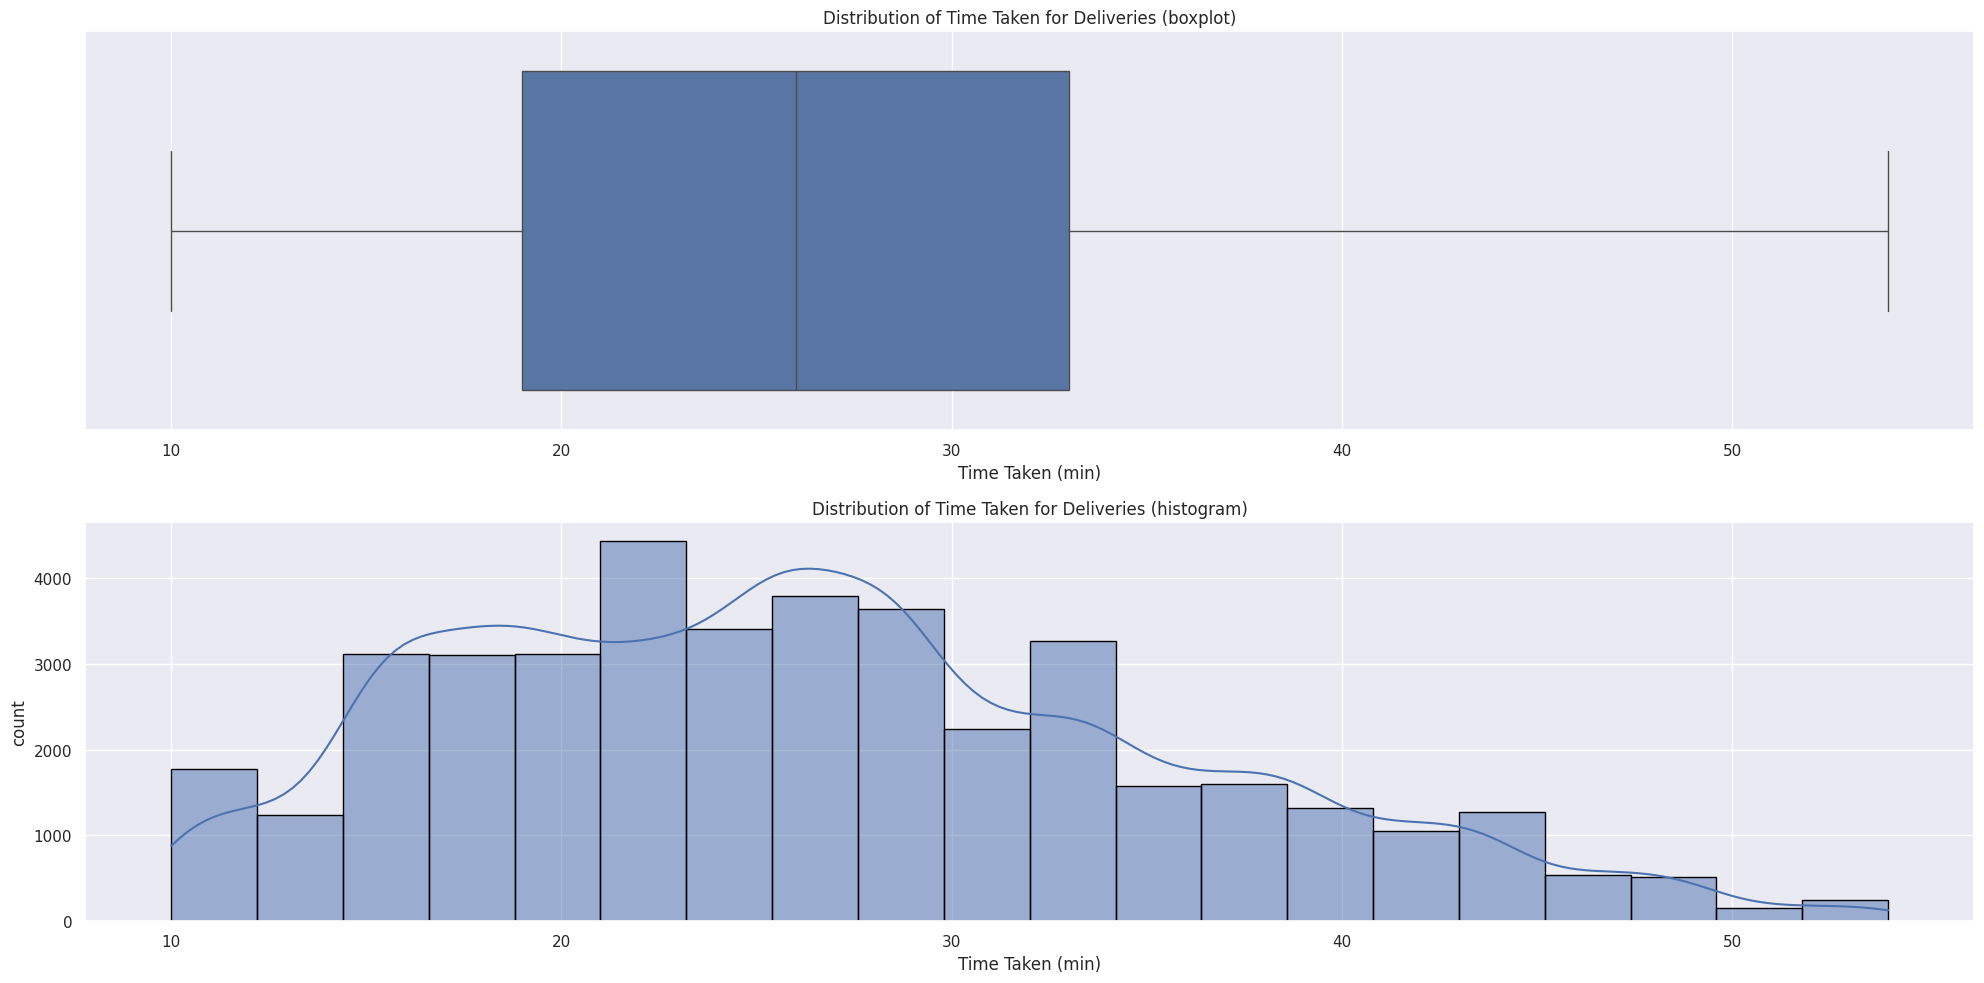

In [ ]:
# Amount of the Time Taken
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

# Boxplot
sb.boxplot(data = cleaned_Data['Time_taken(min)'], orient = "h", ax=ax[0])
ax[0].set_title('Distribution of Time Taken for Deliveries (boxplot)')
ax[0].set_xlabel('Time Taken (min)')

# Histogram
sb.histplot(cleaned_Data['Time_taken(min)'], bins=20, edgecolor='black', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Time Taken for Deliveries (histogram)')
ax[1].set_xlabel('Time Taken (min)')
ax[1].set_ylabel('count')

plt.tight_layout()
plt.show()

As observed from the box plot, there are no outliers in our data, indicating that the time taken values fall within a relatively consistent range without any extreme values. Therefore, there is no need to remove any outliers.

Additionally, the histogram reveals that the range of time taken is from 10 to 54 minutes, allowing us to visualize the frequency of time taken within different intervals. This provides insights into the central tendency and variability of delivery time. Such information may be useful for understanding typical delivery times, identifying potential bottlenecks or inefficiencies in the delivery process, and making informed decisions to optimize delivery operations.

From the dataset, we can see that there are some predictors that correspond to the delivery person, environment, order, and logistical. Below is the grouping of each variable into one of the four categories.

Delivery Person:
- Delivery_person_Age
- Delivery_person_Ratings

Environment:
- Weatherconditions
- Road_traffic_density
- City
- Festival

Order Variables:
- Time_Ordered
- Time_Order_picked
- Type_of_order

Logistical Variables:
- Vehicle_condition
- Type_of_vehicle
- Distance_between_restaurant_and_delivery_place(KM)


We will look at each of these predictors in more detail one by one by analyzing them.



### Predictors corresponding to the Delivery Person



#### Delivery person age

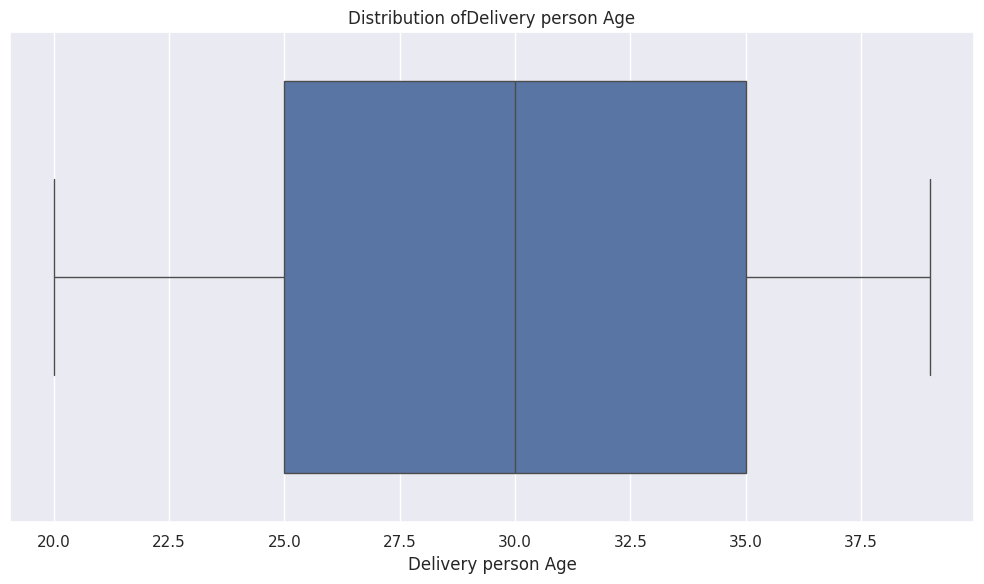

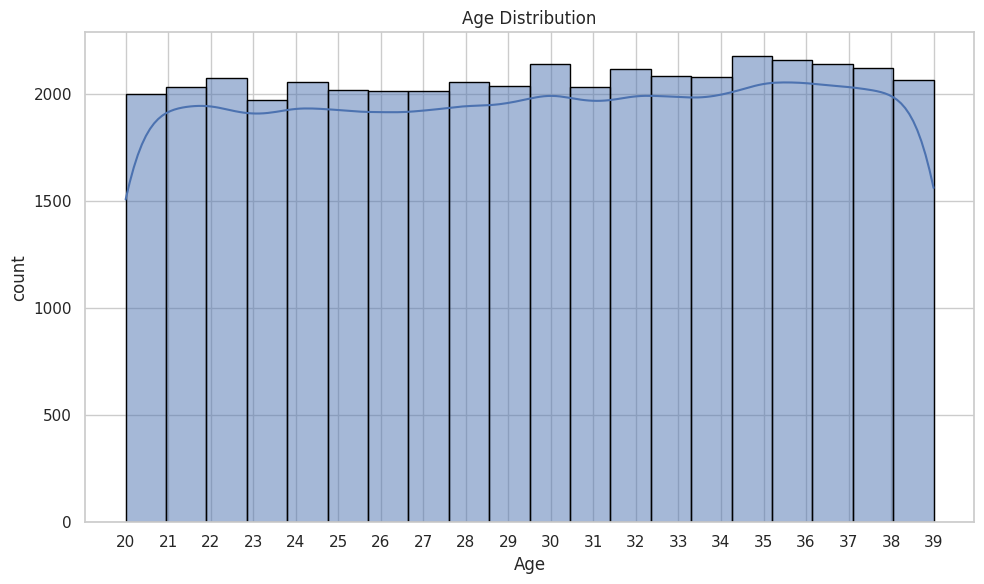

In [ ]:
# Age of the Delivery Person
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Boxplot
sb.boxplot(data = cleaned_Data['Delivery_person_Age'], orient = "h")
plt.title('Distribution ofDelivery person Age')
plt.xlabel('Delivery person Age')
plt.tight_layout()
plt.show()

# Histogram
sb.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ages_with_counts = cleaned_Data['Delivery_person_Age'][cleaned_Data['Delivery_person_Age'].notnull()]
sb.histplot(ages_with_counts, bins=20, kde=True, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(ages_with_counts.unique())
plt.tight_layout()
plt.show()

In [ ]:
# Compute median, Q1, and Q3
median = cleaned_Data['Delivery_person_Age'].median()
Q1 = cleaned_Data['Delivery_person_Age'].quantile(0.25)
Q3 = cleaned_Data['Delivery_person_Age'].quantile(0.75)
min_value = cleaned_Data['Delivery_person_Age'].min()
max_value = cleaned_Data['Delivery_person_Age'].max()

print("Delivery_person_Age:")
print("Median:", median)
print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Q1 (First Quartile):", Q1)
print("Q3 (Third Quartile):", Q3)

Delivery_person_Age:
Median: 30.0
Minimum value: 20
Maximum value: 39
Q1 (First Quartile): 25.0
Q3 (Third Quartile): 35.0


From the box plot, it is evident that there are no outliers in delivery person age, indicating that there are no unusually high or low age values, and the ages of delivery persons fall within the range of 20 to 39. This suggests that most of the delivery persons are relatively young.

#### Delivery person ratings

<AxesSubplot: xlabel='Delivery_person_Ratings', ylabel='Count'>

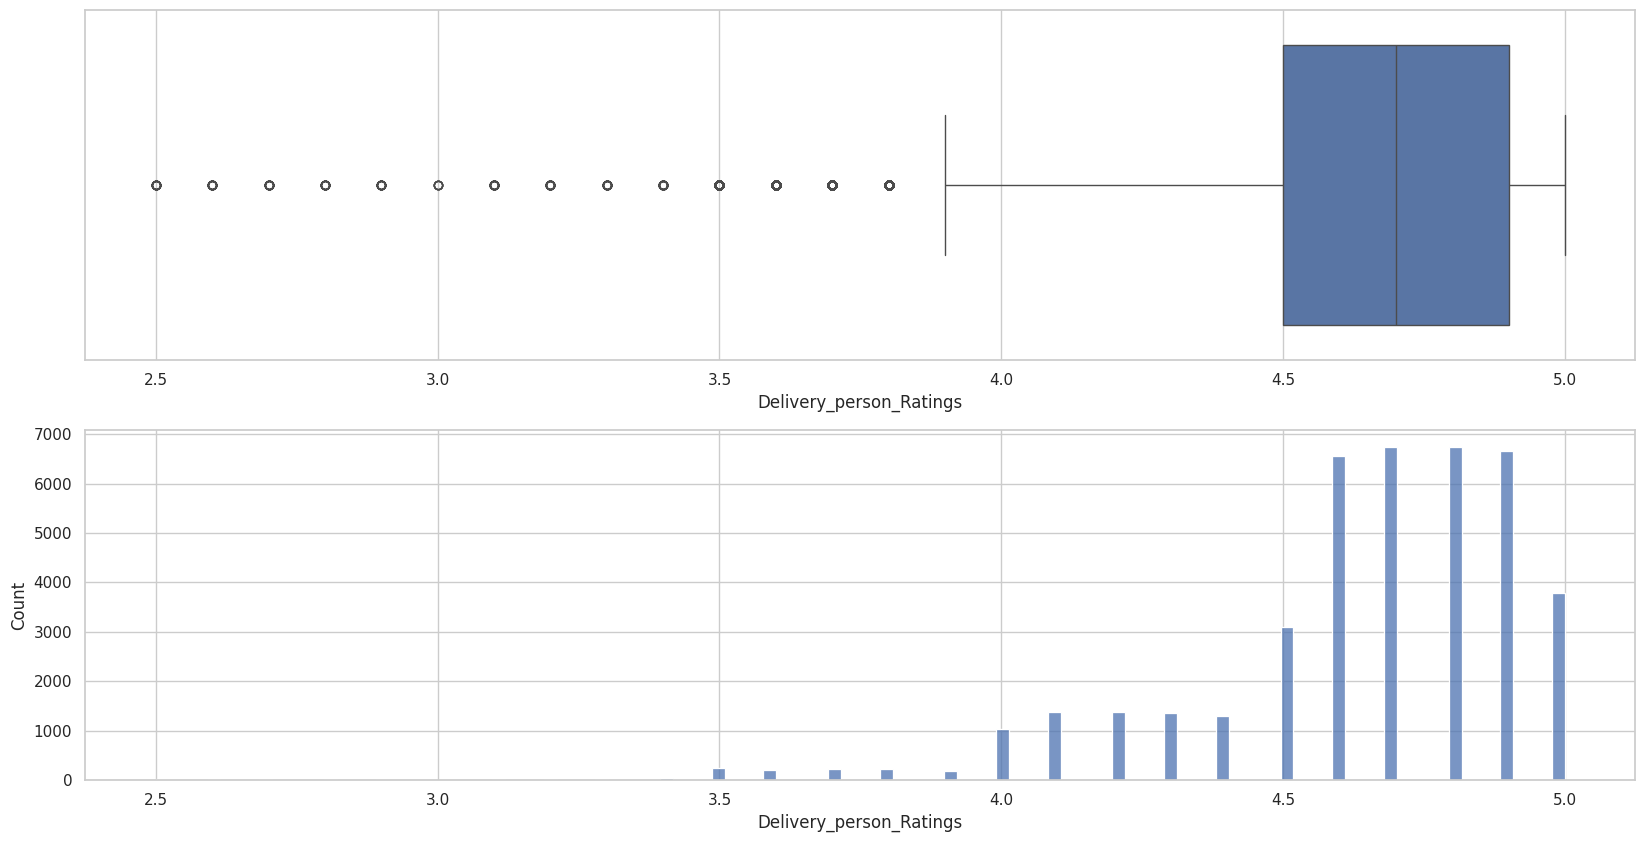

In [ ]:
# Ratings of delivery driver
f, axes = plt.subplots(2, 1, figsize=(20, 10))
sb.boxplot(data = cleaned_Data['Delivery_person_Ratings'], orient = "h", ax = axes[0])
sb.histplot(data = cleaned_Data['Delivery_person_Ratings'].sort_values(), ax = axes[1])

In [ ]:
# Compute median, Q1, and Q3
median = cleaned_Data['Delivery_person_Ratings'].median()
Q1 = cleaned_Data['Delivery_person_Ratings'].quantile(0.25)
Q3 = cleaned_Data['Delivery_person_Ratings'].quantile(0.75)
min_value = cleaned_Data['Delivery_person_Ratings'].min()
max_value = cleaned_Data['Delivery_person_Ratings'].max()

print("Delivery_person_Ratings:")
print("Median:", median)
print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Q1 (First Quartile):", Q1)
print("Q3 (Third Quartile):", Q3)

Delivery_person_Ratings:
Median: 4.7
Minimum value: 2.5
Maximum value: 5.0
Q1 (First Quartile): 4.5
Q3 (Third Quartile): 4.9


We can observe that the average ratings of the delivery persons mostly range between 4.5 and 4.8, with occasional outliers indicating lower ratings, possibly due to slow delivery times. 

Understanding the distribution of delivery person ratings can provide insights into customer satisfaction levels and help identify areas for improvement in delivery service quality.

Furthermore, addressing any issues related to slow delivery times can be crucial for maintaining high customer ratings and enhancing overall customer experience.

## Predictors corresponding to the Environment



#### Weather Conditions

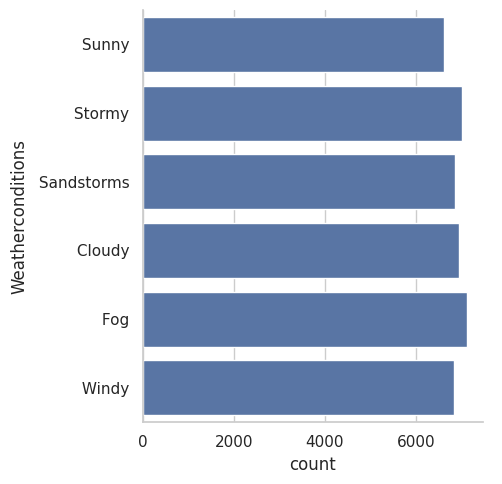

In [ ]:
# Environmental Conditions
sb.catplot(y = 'Weatherconditions', data = cleaned_Data, kind = "count")

The graph above illustrates a diverse range of weather conditions observed throughout the duration of our dataset. 

The occurrences of these different weather conditions appear to be fairly evenly distributed, indicating a balanced representation across the dataset. 

This variation in weather patterns may be attributed to local climatic trends, seasonal changes, and geographic location.

#### Road traffic density

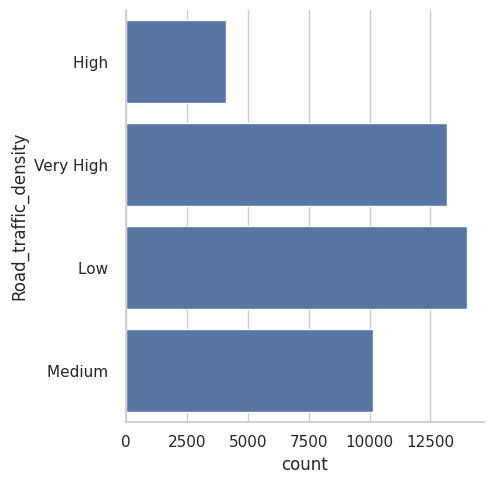

In [ ]:
# Environmental Conditions
sb.catplot(y = 'Road_traffic_density', data = cleaned_Data, kind = "count")

The graph reveals that the highest count corresponds to the lowest traffic density, followed by very high, medium, and low traffic densities. 

The presence of all four density levels indicates fluctuations in traffic conditions, which may be influenced by factors such as the day of the week, time of day, road infrastructure, population density, and any events or incidents affecting traffic flow. 

Additionally, the lower count for high road traffic density could be attributed to the similarity between high and very high densities, prompting delivery personnel to select 'very high' instead.

#### City

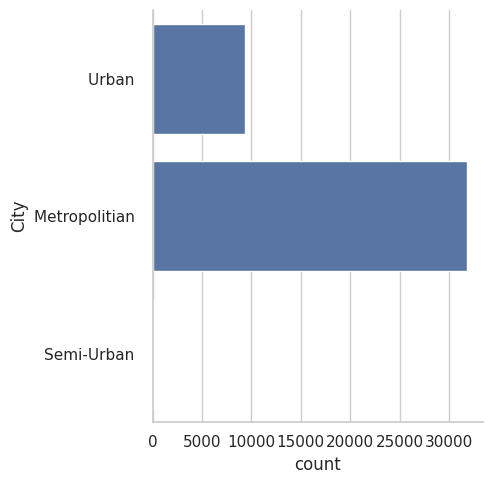

In [ ]:
# Environmental Conditions
sb.catplot(y = 'City', data = cleaned_Data, kind = "count") #Metropolitian Cities ordered most of the orders

Based on the graph above, metropolitan areas demonstrate the highest count, followed by urban and semi-urban areas. 

The high count in metropolitan areas could be attributed to their suitability for food delivery services, owing to their dense populations and large size.

Similarly, urban areas, despite having lower populations compared to metropolitan areas, still show a demand for food delivery services. 

This is might be because urban areas encompass both commercial and residential zones, catering to diverse lifestyles and culinary preferences, thereby creating a substantial market for food delivery.

#### Festival

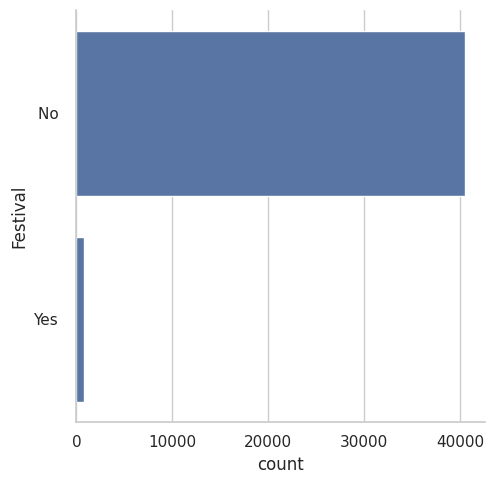

In [ ]:
# Environmental Conditions
sb.catplot(y = 'Festival', data = cleaned_Data, kind = "count")

The significant decrease in food delivery counts during festivals compared to non-festival periods suggests seasonal fluctuations in demand for delivery services. 

This could be attributed to festivals occurring only a few times a year, resulting in fewer delivery orders. Additionally, cultural and familial traditions associated with festivals often prioritize homemade meals, reducing reliance on delivery food orders. 

Furthermore, restaurant closures during festivals may contribute to the decline in delivery counts. It is also probable that individuals who placed orders during festival seasons were influenced by marketing and promotions associated with these occasions.

## Predictors Corresponding to Order Variables:

#### Time Ordered

We want to analyze the peak times for orders, so we've broken down the 'Time Order' variable into hours and minutes. We'll focus specifically on the hour part to determine when people tend to order the most.

In [ ]:
cleaned_Data['Time_Orderd_Hour']=cleaned_Data['Time_Orderd'].str.split(':',expand=True)[0]
cleaned_Data.dropna(subset=['Time_Orderd_Hour'],inplace=True)
cleaned_Data['Time_Orderd_Hour']=cleaned_Data['Time_Orderd_Hour'].astype('int64')
cleaned_Data['Time_Orderd_Min']=cleaned_Data['Time_Orderd'].str.split(':',expand=True)[1]
cleaned_Data['Time_Orderd_Min']=cleaned_Data['Time_Orderd_Min'].astype('int64')
cleaned_Data

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Time_taken(min),Distance_between_restaurant_and_delivery_place(KM),Time_Orderd_Hour,Time_Orderd_Min
0,37,4.9,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,No,Urban,24,3,11,30
1,34,4.5,19:45:00,19:50:00,Stormy,Very High,2,Snack,scooter,No,Metropolitian,33,20,19,45
2,23,4.4,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,No,Urban,26,2,8,30
3,38,4.7,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,No,Metropolitian,21,8,18,0
4,32,4.6,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,No,Metropolitian,30,6,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,No,Metropolitian,32,1,11,35
45589,21,4.6,19:55:00,20:10:00,Windy,Very High,0,Buffet,motorcycle,No,Metropolitian,36,11,19,55
45590,30,4.9,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,No,Metropolitian,16,5,23,50
45591,20,4.7,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,No,Metropolitian,26,6,13,35


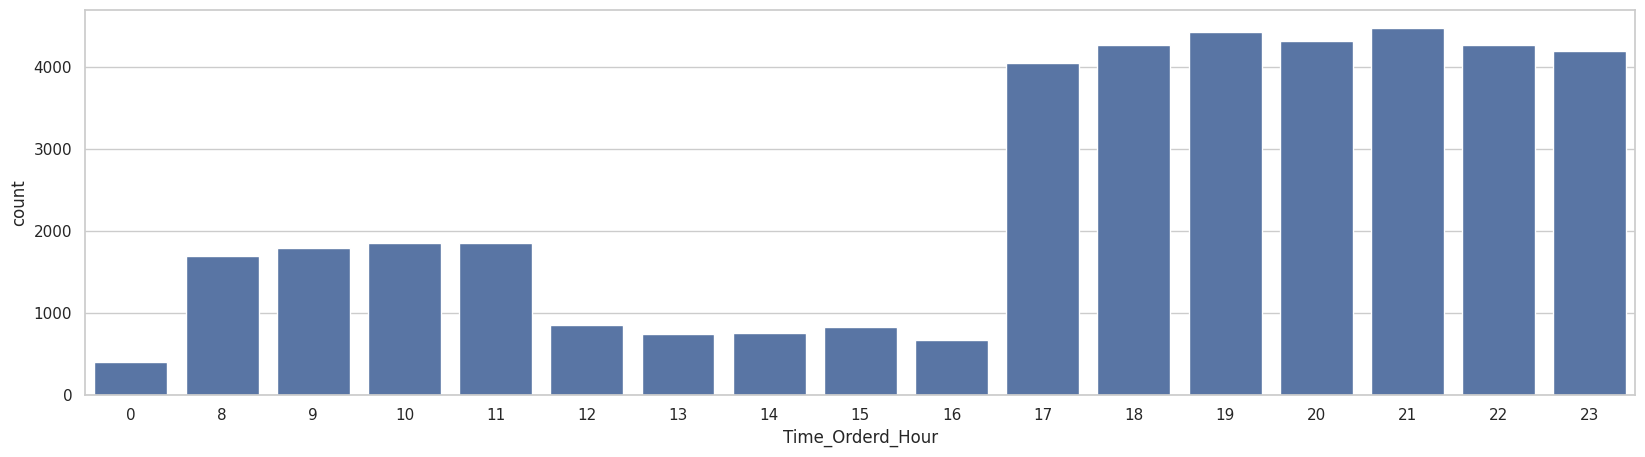

In [ ]:
#Now we plot it out to see what period of time do most people order
plt.figure(figsize=(20,5))
sb.countplot(x=cleaned_Data['Time_Orderd_Hour'])
plt.xticks(rotation='horizontal')
plt.show()


The graphs illustrate a notable absence of orders between 0100 and 0700 hours. The highest ordering hours are observed between 1900 and 2100 hours, followed by 1100 to 1400 hours, and midnight at 0000 hours.

The peak ordering hours, particularly between 1900 and 2100 hours, suggest a significant preference among customers to place their orders in the evening, likely after returning from work or during leisure time, coinciding with dinner hours for many. 

There's also a noteworthy demand for lunchtime meal delivery during the second peak ordering hours, spanning from 1100 to 1400 hours. 

Additionally, late-night orders are evident between 2200 and 0000 hours, possibly due to night shifts, social gatherings, or late-night cravings. Finally, the absence of orders from 0100 to 0700 hours may indicate a period of reduced demand for food delivery while people are asleep.

#### Time Ordered Picked

We also aim to analyze the duration between when an order is placed and when it is picked up. To achieve this, we have split the 'Time Order Picked' variable into hours and minutes.

In [ ]:
cleaned_Data['Time_Orderd_Picked_Hour']=cleaned_Data['Time_Order_picked'].str.split(':',expand=True)[0]
cleaned_Data.dropna(subset=['Time_Orderd_Hour'],inplace=True)
cleaned_Data['Time_Orderd_Picked_Hour']=cleaned_Data['Time_Orderd_Picked_Hour'].astype('int64')
cleaned_Data['Time_Orderd_Picked_Min']=cleaned_Data['Time_Order_picked'].str.split(':',expand=True)[1]
cleaned_Data['Time_Orderd_Picked_Min']=cleaned_Data['Time_Orderd_Picked_Min'].astype('int64')
cleaned_Data

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Time_taken(min),Distance_between_restaurant_and_delivery_place(KM),Time_Orderd_Hour,Time_Orderd_Min,Time_Orderd_Picked_Hour,Time_Orderd_Picked_Min
0,37,4.9,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,No,Urban,24,3,11,30,11,45
1,34,4.5,19:45:00,19:50:00,Stormy,Very High,2,Snack,scooter,No,Metropolitian,33,20,19,45,19,50
2,23,4.4,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,No,Urban,26,2,8,30,8,45
3,38,4.7,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,No,Metropolitian,21,8,18,0,18,10
4,32,4.6,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,No,Metropolitian,30,6,13,30,13,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,No,Metropolitian,32,1,11,35,11,45
45589,21,4.6,19:55:00,20:10:00,Windy,Very High,0,Buffet,motorcycle,No,Metropolitian,36,11,19,55,20,10
45590,30,4.9,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,No,Metropolitian,16,5,23,50,0,5
45591,20,4.7,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,No,Metropolitian,26,6,13,35,13,40


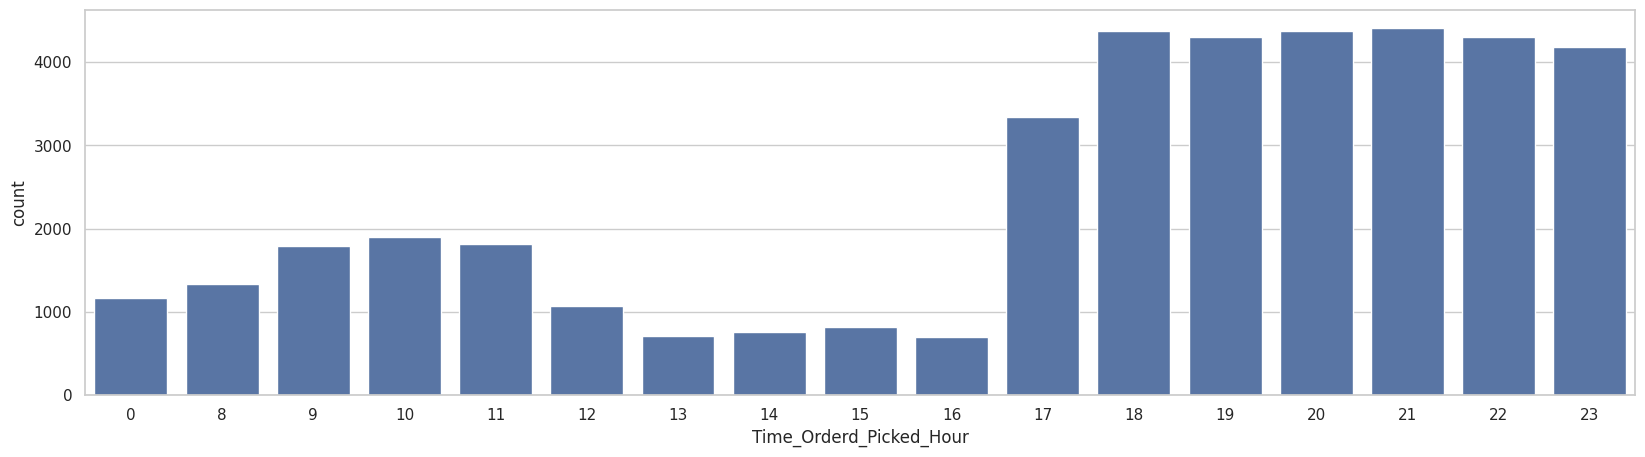

In [ ]:
#Now we plot it out to see what period of time does the order gets pick up
plt.figure(figsize=(20,5))
sb.countplot(x=cleaned_Data['Time_Orderd_Picked_Hour'])
plt.xticks(rotation='horizontal')
plt.show()


The plot reveals a pattern similar to the 'Time Ordered Hour' graph above, indicating that most orders are picked up by delivery personnel within minutes of being placed. 

Since we've plotted only the hour part, the data mostly aligns with the graph above. However, slight discrepancies may occur when orders are placed towards the end of an hour (between 45 to 59 minutes), leading to the delivery person picking up the order in the subsequent hour.

#### Type of Order

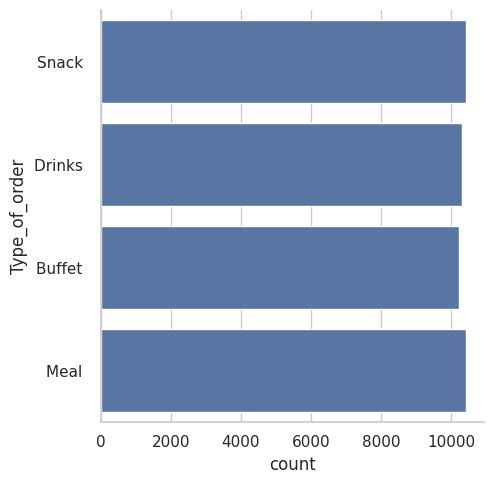

In [ ]:
sb.catplot(y = 'Type_of_order', data = cleaned_Data, kind = "count")

The graph indicates that the count for each type of order is nearly identical. This suggests that customers exhibit diverse preferences and ordering behaviors. 

Some customers may prefer snacks or drinks for quick bites or refreshments, which are often associated with spontaneous or casual orders. 

Conversely, others may opt for buffets or full meals, which are likely favored for planned meals or special occasions.

## Predictors Corresponding to Logisticals Variables

#### Vehicle Condition

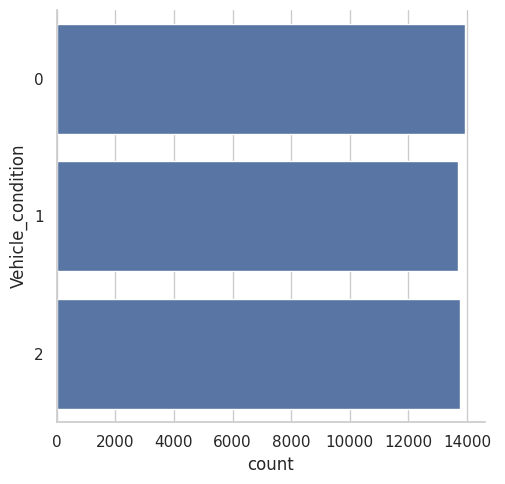

In [ ]:
sb.catplot(y = 'Vehicle_condition', data = cleaned_Data, kind = "count")

Based on the graph above, we observe that the counts for each category are nearly identical. This suggests that the dataset offers a balanced representation of vehicle conditions, implying that it is comprehensive and not biased towards any specific condition. 

Additionally, we can infer that the dataset encompasses deliveries made using vehicles in various states of repair and maintenance. This aspect could be valuable for analyzing the impact of vehicle condition on delivery performance.

#### Type of Vehicle

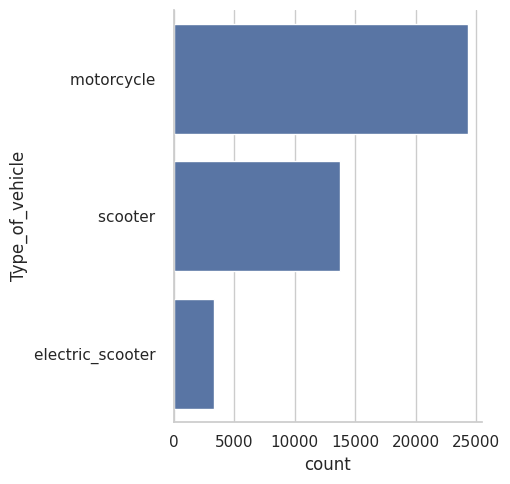

In [ ]:
sb.catplot(y = 'Type_of_vehicle', data = cleaned_Data, kind = "count")

The graph suggests that motorcycles are the preferred choice of vehicle for food delivery services, offering advantages such as speed, maneuverability, and accessibility in navigating through traffic, thus facilitating efficient order delivery in urban and suburban environments. 

The presence of scooters and electric scooters may be attributed to delivery drivers who prioritize factors like fuel efficiency, environmental sustainability, or ease of parking.

#### Distance between restaurant and delivery place

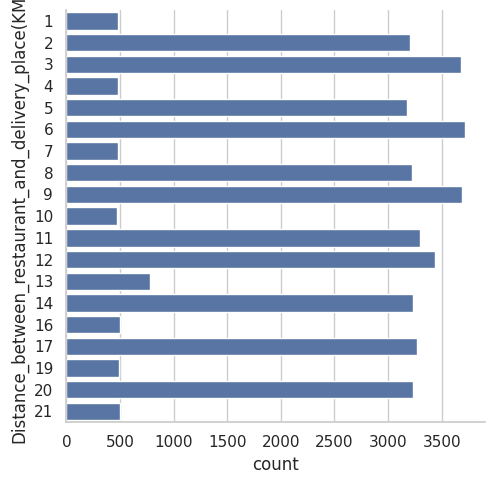

In [ ]:
sb.catplot(y = 'Distance_between_restaurant_and_delivery_place(KM)', data = cleaned_Data, kind = "count") 

This data indicates that delivery services accommodate customers within a radius ranging from 1km to 21km from the restaurant. 

Most distances fall within the range of 2-3km, 5-6km, 8-9km, 11-12km, 14km, 17km, and 20km, suggesting that the majority of delivery orders are made within a moderate distance range. 

The distribution of distances may also reflect customer behavior and preferences regarding food delivery.

## Effect of each variables correspond to time taken for delivery.


### Delivery Person Variables Vs Time Taken


#### Delivery Person Age

<AxesSubplot: title={'center': 'Delivery Person Age vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Delivery_person_Age'>

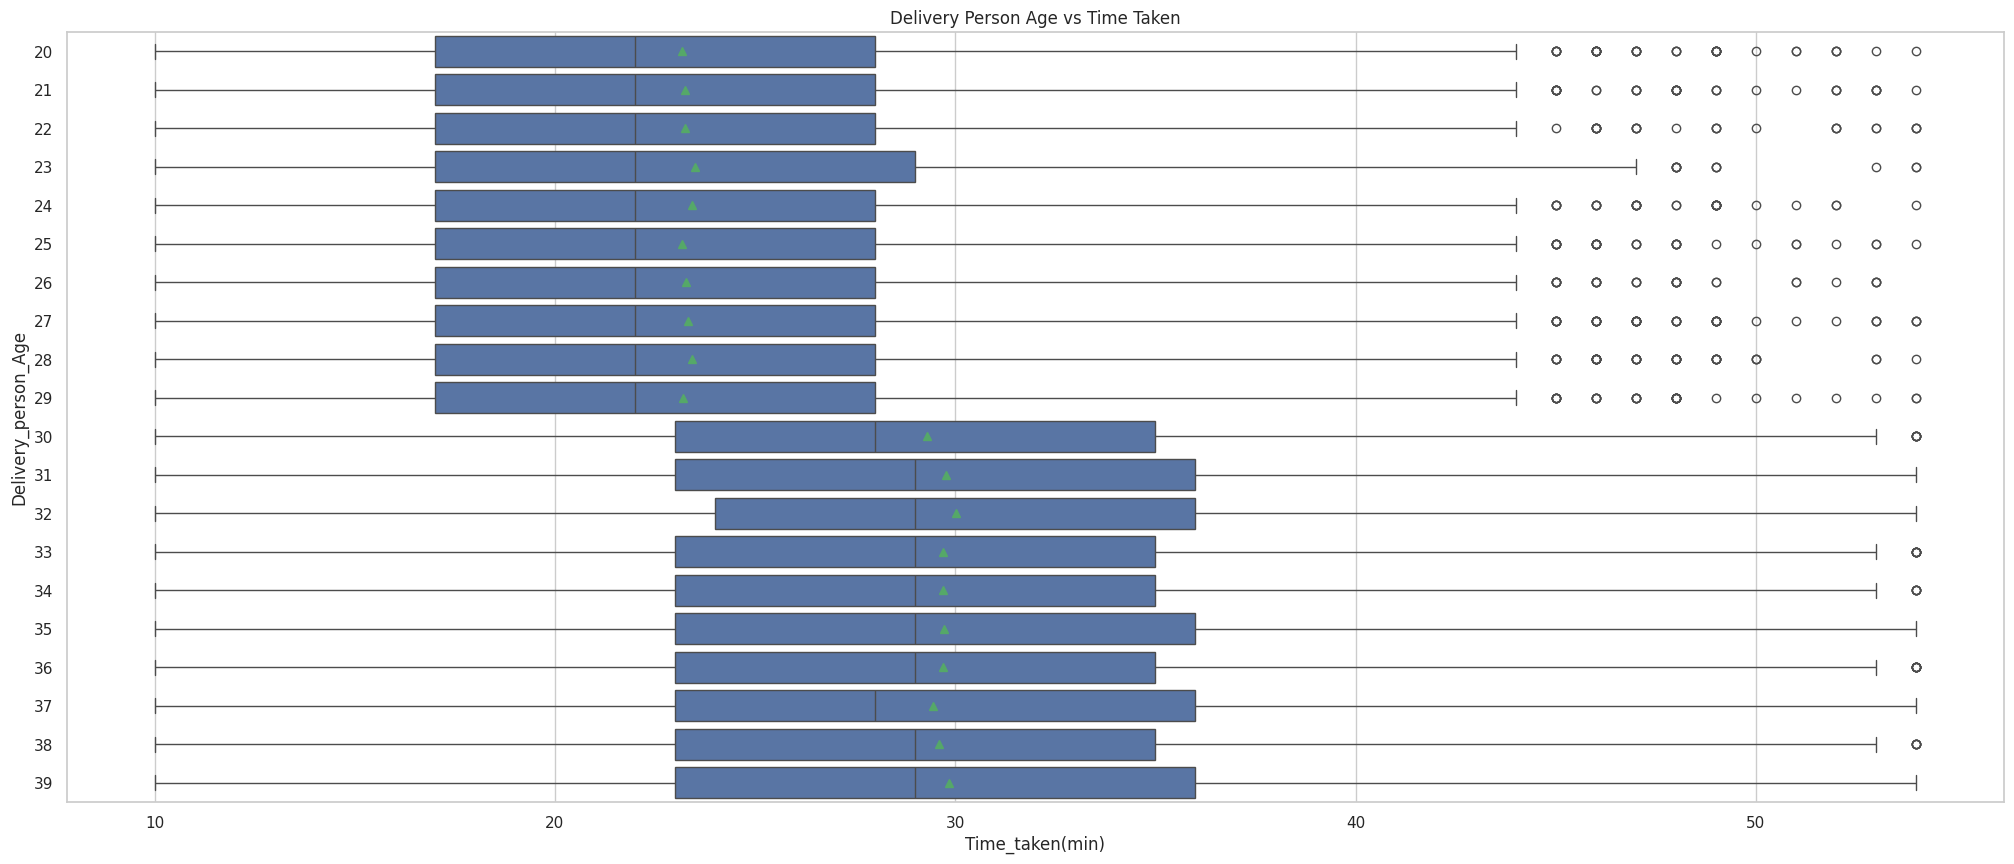

In [ ]:
#Delivery Person Age vs Time Taken, green arrow indicates the mean
plt.figure(figsize=(25,10))
plt.title('Delivery Person Age vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Delivery_person_Age', data=cleaned_Data,orient='h', showmeans=True)

From the boxplot of Delivery Person's Age versus Time Taken, we observe that the average time taken for a delivery person to deliver food increases with age. 

This suggests that older delivery people might take longer to deliver our food. However, we also notice some outliers in the younger age group, indicating that they too may take longer to deliver our food

#### Delivery Person Rating

<AxesSubplot: title={'center': 'Delivery Person Rating vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Delivery_person_Ratings'>

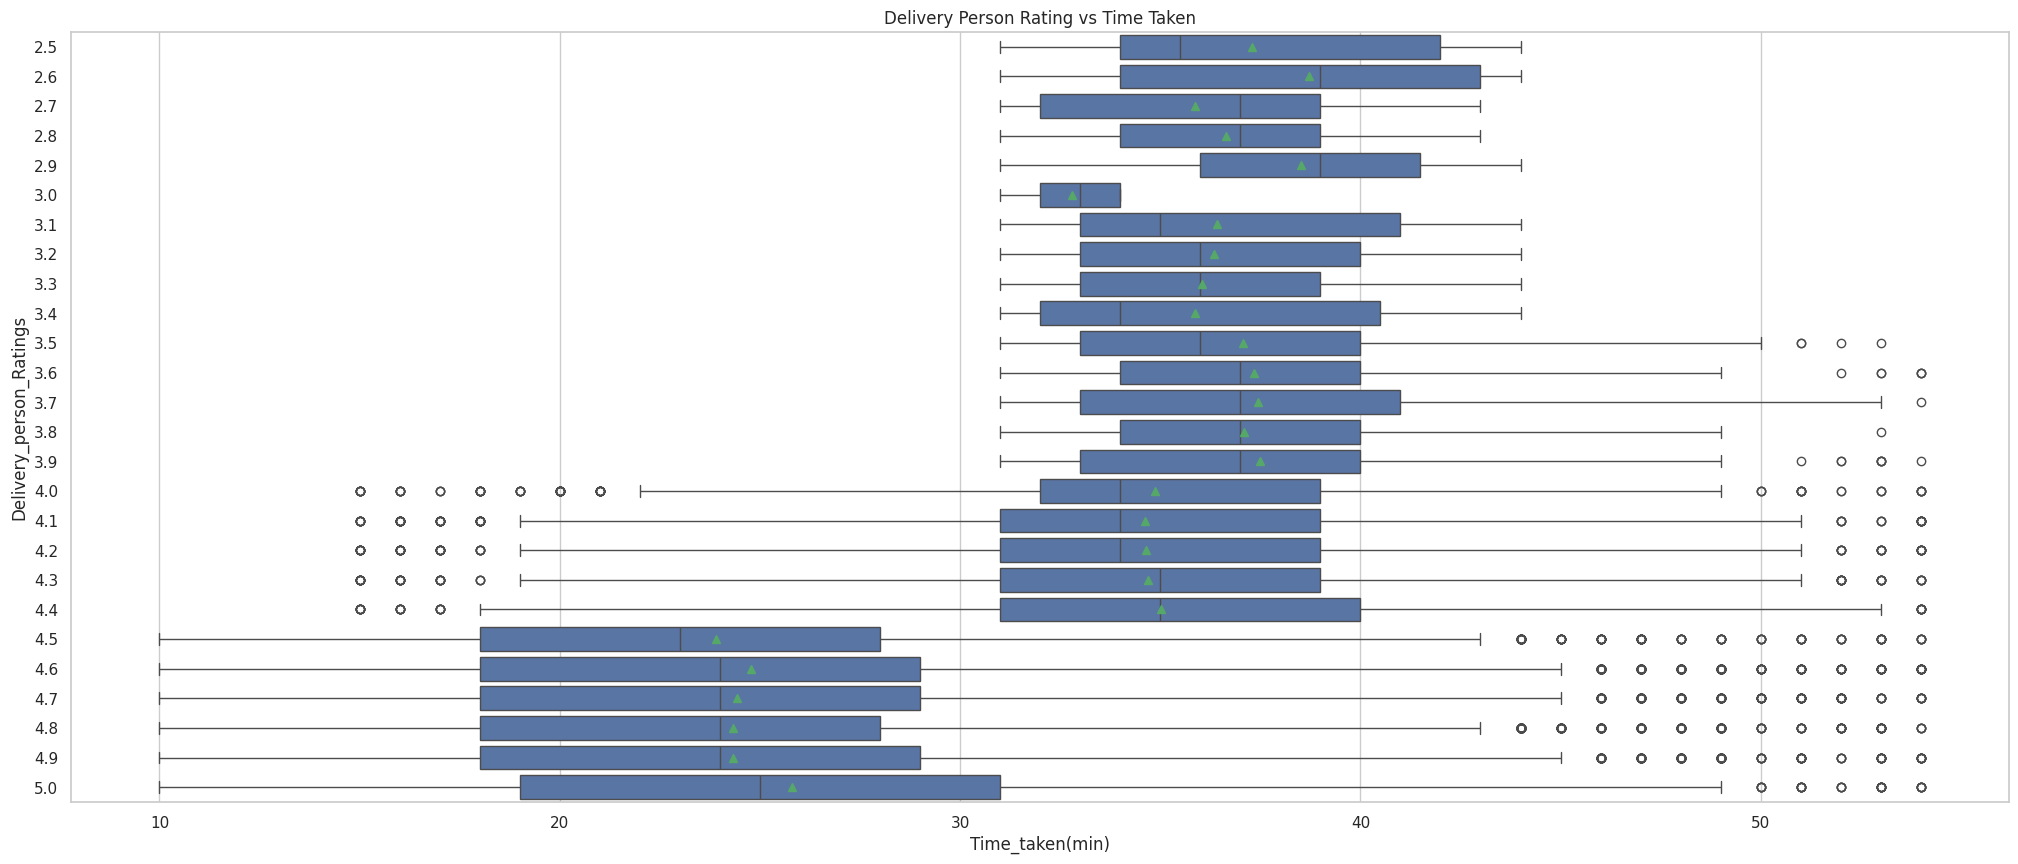

In [ ]:
# Rating vs Amount and Duration
plt.figure(figsize=(25, 10))
plt.title('Delivery Person Rating vs Time Taken')
sb.boxplot(x = 'Time_taken(min)', y = 'Delivery_person_Ratings', data = cleaned_Data, orient='h', showmeans=True)

#plt.figure(figsize=(25,6))
#plt.subplot(1,2,2)
#rating = cleaned_Data.groupby('Delivery_person_Ratings')['Time_taken(min)'].median().reset_index()
#sb.lineplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=rating)

From the box plot above, it is apparent that the rating of the delivery person is influenced by the time taken for delivery. A trend emerges where lower ratings correspond to longer delivery times. This indicates that the rating of the delivery person may serve as a useful predictor in estimating the time taken for delivery.

Furthermore, we observe that delivery persons with ratings between 4.5 and 5.0 tend to have shorter delivery times. This suggests that higher-rated delivery persons are generally more efficient or effective in completing deliveries within shorter time frames.

### Environment Variables vs Time Taken:

#### Weather Condition

<AxesSubplot: title={'center': 'Weather Conditions vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Weatherconditions'>

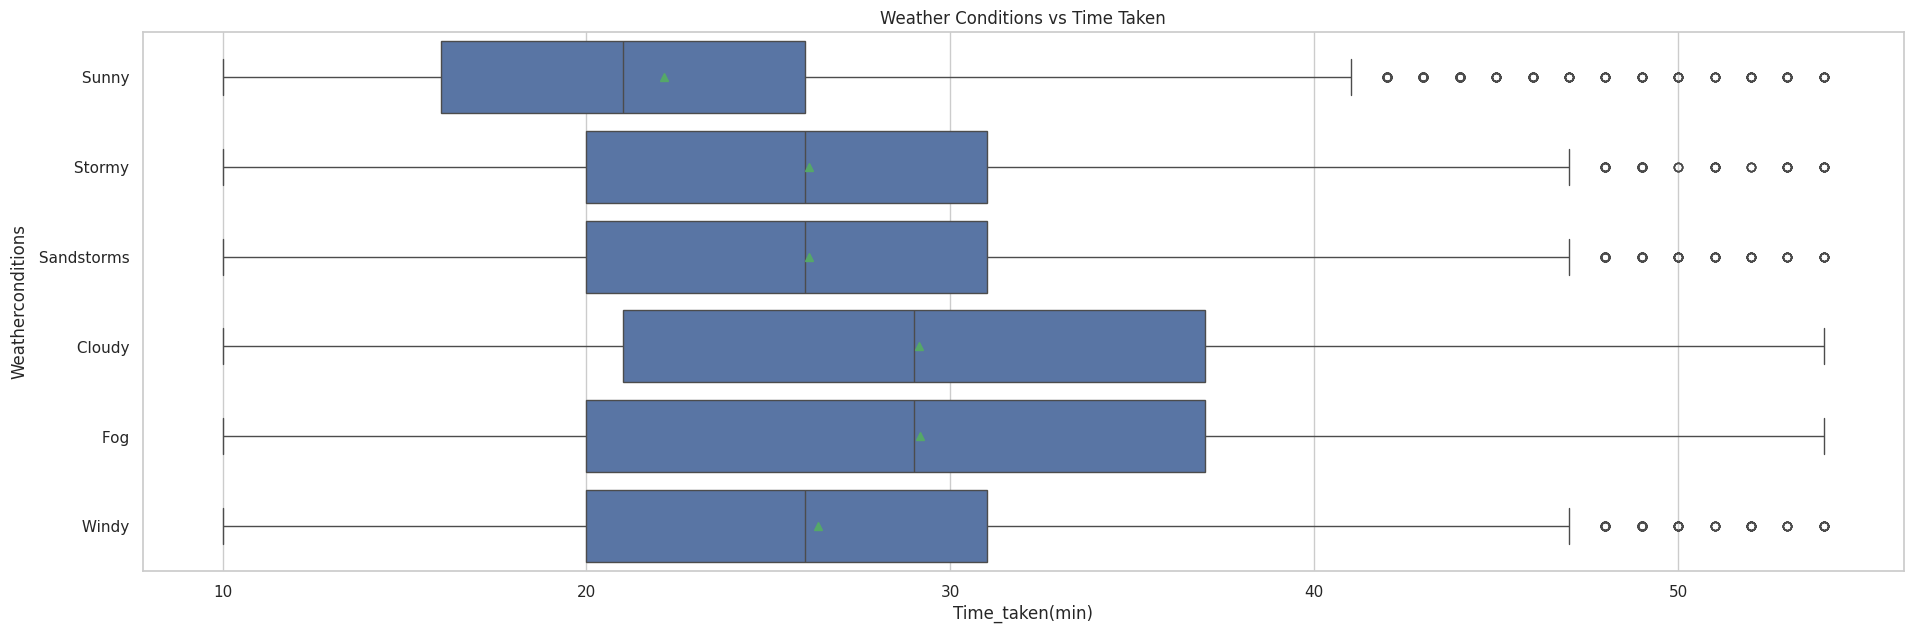

In [ ]:
#First we will like to see if the different weather conditions affects the time taken for delivery
plt.figure(figsize=(50,7))
plt.subplot(1,2,2)
plt.title('Weather Conditions vs Time Taken')
sb.boxplot(x=cleaned_Data['Time_taken(min)'], y='Weatherconditions', data=cleaned_Data, showmeans=True)

From the boxplot, we observe that the time taken for delivery is longest during cloudy and foggy weather conditions. 

This is somewhat surprising, as one would expect stormy and sandstorm conditions to significantly impact delivery times due to their harshness. 

However, this unexpected finding might be attributed to fewer drivers willing to make deliveries during stormy and sandstorm weather, resulting in limited data for these conditions. 

#### Road Traffic Density

<AxesSubplot: title={'center': 'Road Traffic Density vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Road_traffic_density'>

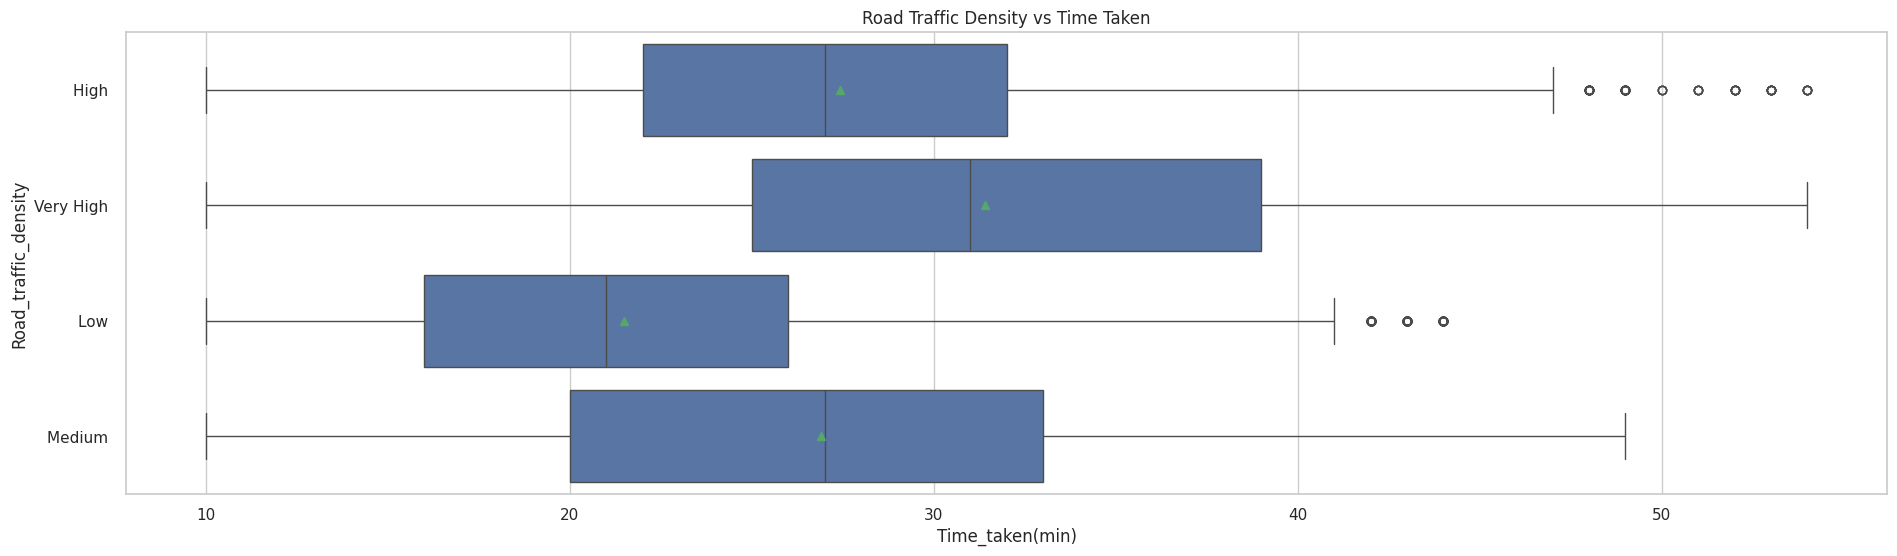

In [ ]:
# Next, we like to see if the amount of traffic affect the Delivery time
plt.figure(figsize=(50,6))
plt.subplot(1,2,2)
plt.title('Road Traffic Density vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Road_traffic_density', data=cleaned_Data,showmeans=True)

As expected, the boxplot indicates that low traffic density has the lowest mean delivery time compared to other traffic conditions, while very high traffic density has the highest mean delivery time. 

This suggests that lower traffic density enables delivery persons to complete deliveries at a faster rate compared to other traffic conditions. This observation could serve as a useful predictor for estimating delivery times.

#### City

<AxesSubplot: title={'center': 'Type of City vs Time Taken'}, xlabel='Time_taken(min)', ylabel='City'>

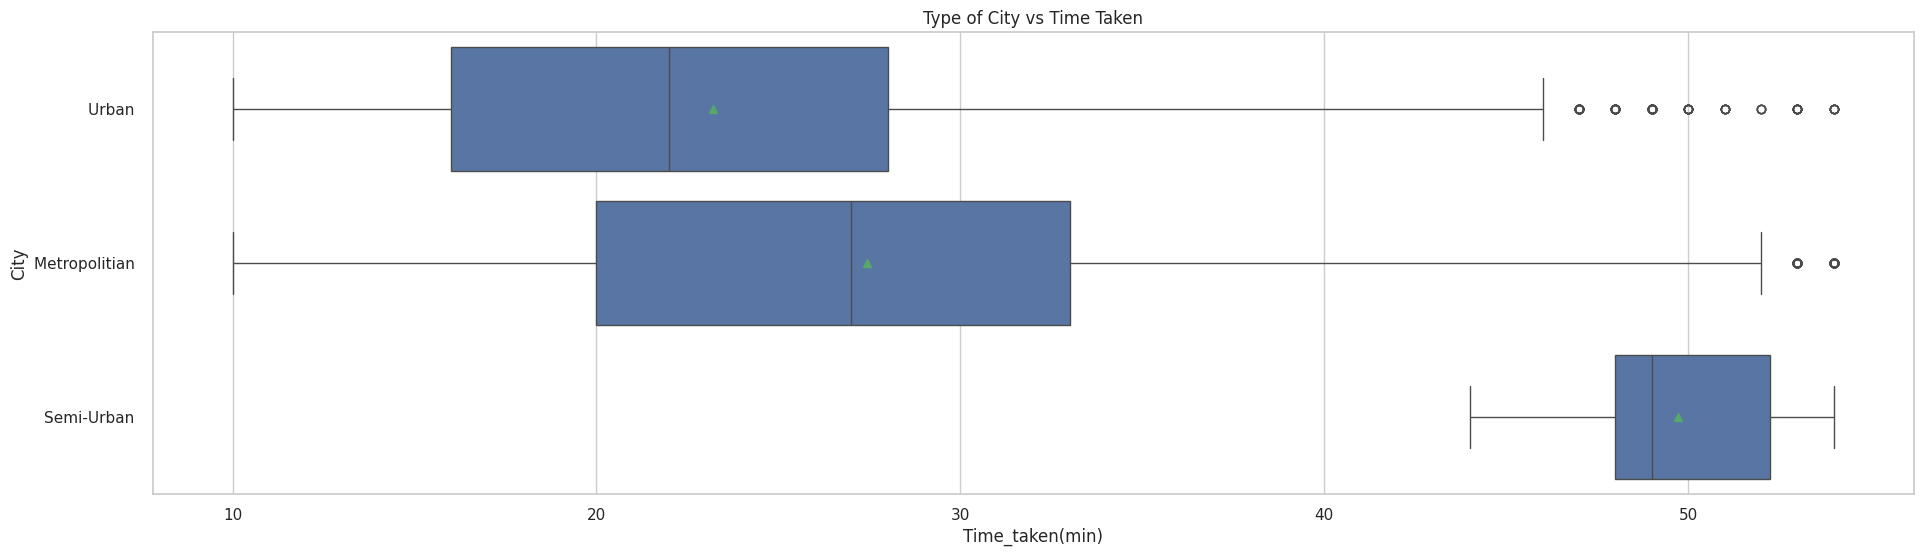

In [ ]:
# Now we like to see if the different type of cities affect the Delivery time
plt.figure(figsize=(50,6))
plt.subplot(1,2,2)
plt.title('Type of City vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='City', data=cleaned_Data, showmeans=True)


The boxplot reveals that the longest delivery times occur in semi-urban cities. This could be attributed to factors such as less developed infrastructure, fewer transportation options, or longer distances between delivery points in semi-urban areas, all contributing to extended delivery times. 

Conversely, urban areas, characterized by higher population density and better infrastructure, likely facilitate more efficient delivery operations, resulting in shorter delivery times. Delivery persons in urban areas may encounter less traffic congestion, shorter travel distances, and easier navigation compared to those in semi-urban areas. 

While metropolitan areas generally boast more advanced infrastructure and transportation networks compared to semi-urban areas, the variability in delivery times depicted by the box plot suggests that delivery times in metropolitan areas may fluctuate. This variability could be influenced by factors such as traffic congestion, population density, and the size and layout of the city

#### Festival

<AxesSubplot: title={'center': 'Festival vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Festival'>

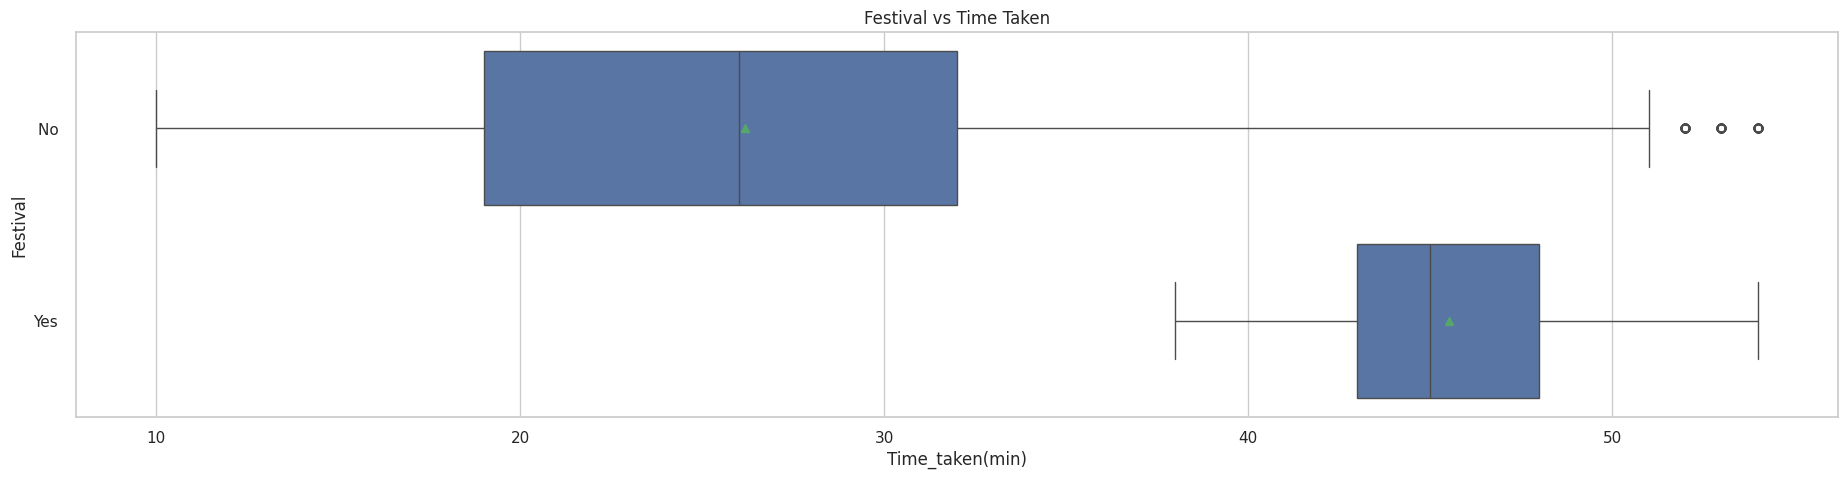

In [ ]:
#Festival
plt.figure(figsize=(50, 5))
plt.subplot(1, 2, 1)
plt.title('Festival vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Festival', data=cleaned_Data, showmeans=True)

From this boxplot, we observe that if the day people place orders happens to be a festive day, delivery times tend to be longer. This could be due to restaurants being busier during festive periods, resulting in longer waiting times. 

Additionally, streets may be congested during festive periods, further impacting delivery times.

### Order variables against time taken

#### Time Order

<AxesSubplot: title={'center': 'Time Orderd(Hour) vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Time_Orderd_Hour'>

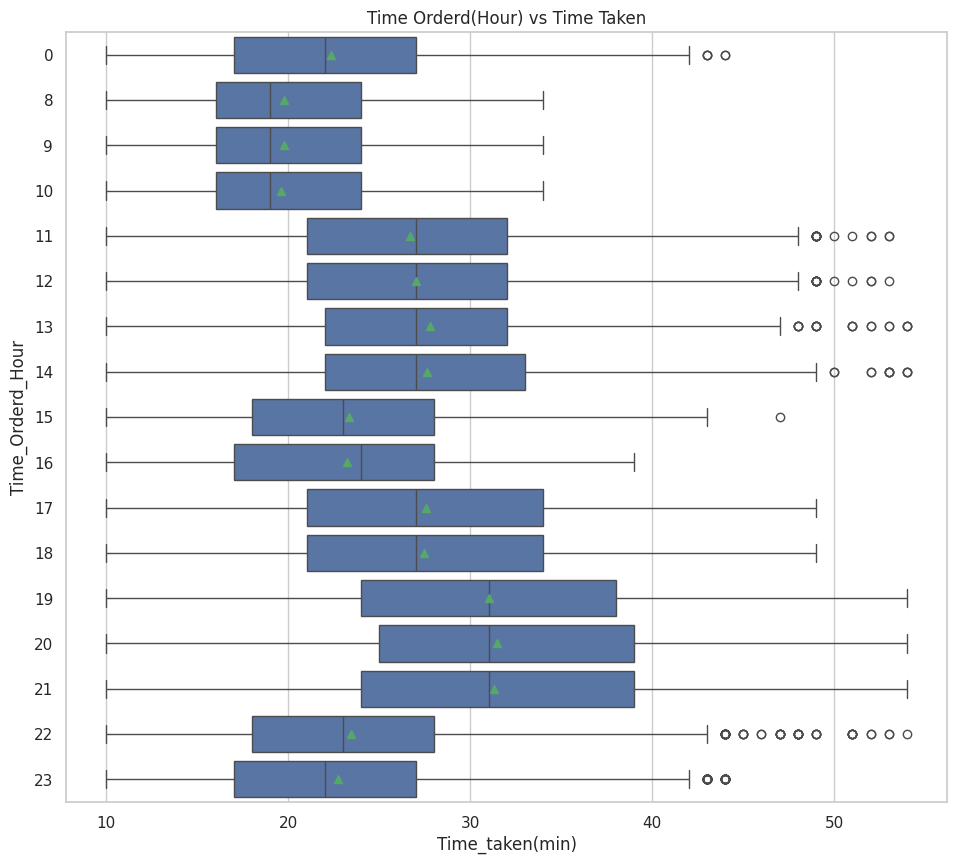

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Time Orderd(Hour) vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Time_Orderd_Hour', data=cleaned_Data, orient='h', showmeans=True)

We can observe that delivery orders placed between 1700-2100hrs take the longest delivery time. This could be attributed to the fact that this time range corresponds to peak dinner hours, with many customers ordering food for their evening meals. 

During this time, restaurants may experience higher order volumes, leading to longer preparation times. Additionally, increased traffic congestion during rush hour can further delay delivery drivers, contributing to extended delivery times. 

Moreover, delivery services may experience higher demand and limited availability of delivery personnel during peak hours, leading to longer wait times for deliveries.

#### Time Order Picked

<AxesSubplot: title={'center': 'Time Orderd Picked (Hour) vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Time_Orderd_Picked_Hour'>

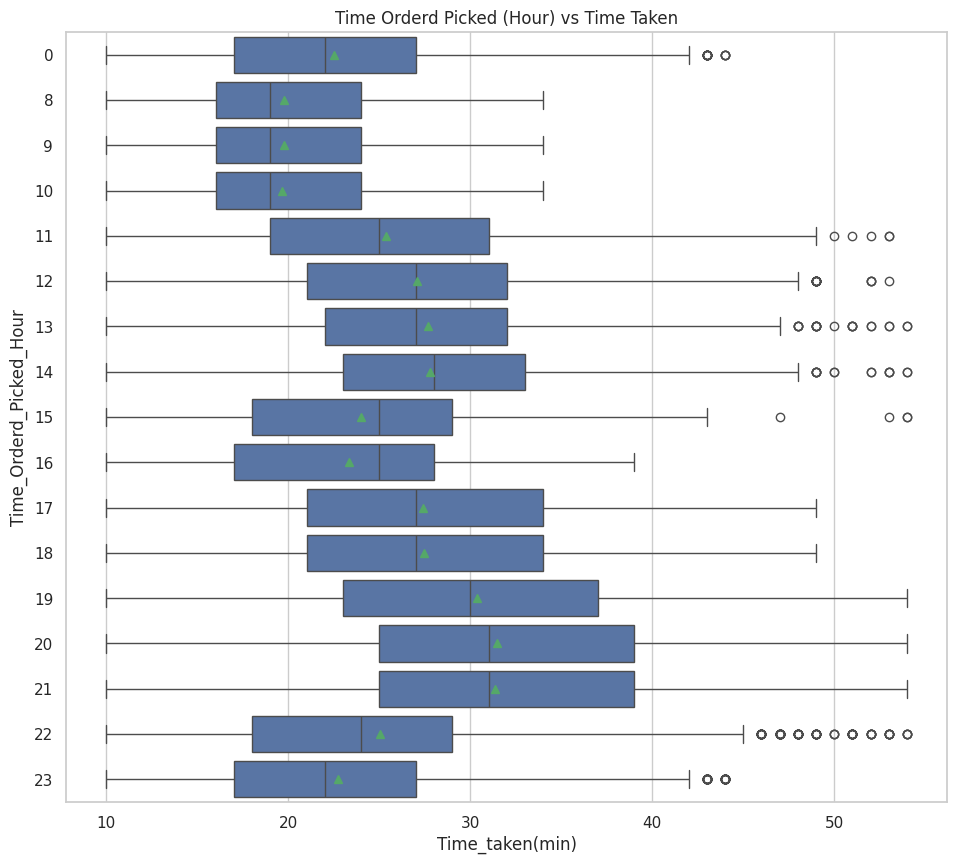

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Time Orderd Picked (Hour) vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Time_Orderd_Picked_Hour', data=cleaned_Data, orient='h', showmeans=True)

The boxplot closely resembles that of Time Ordered, indicating that delivery persons typically pick up orders within minutes of them being made. 

However, we can observe that delivery times are longest around 1700 to 2100hrs, which coincides with peak hours. During this time range, restaurants experience heightened demand, leading to longer preparation times. 

Additionally, increased traffic congestion during rush hour can further delay delivery drivers, contributing to extended delivery times.

#### Type of Order

<AxesSubplot: title={'center': 'Type of order vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Type_of_order'>

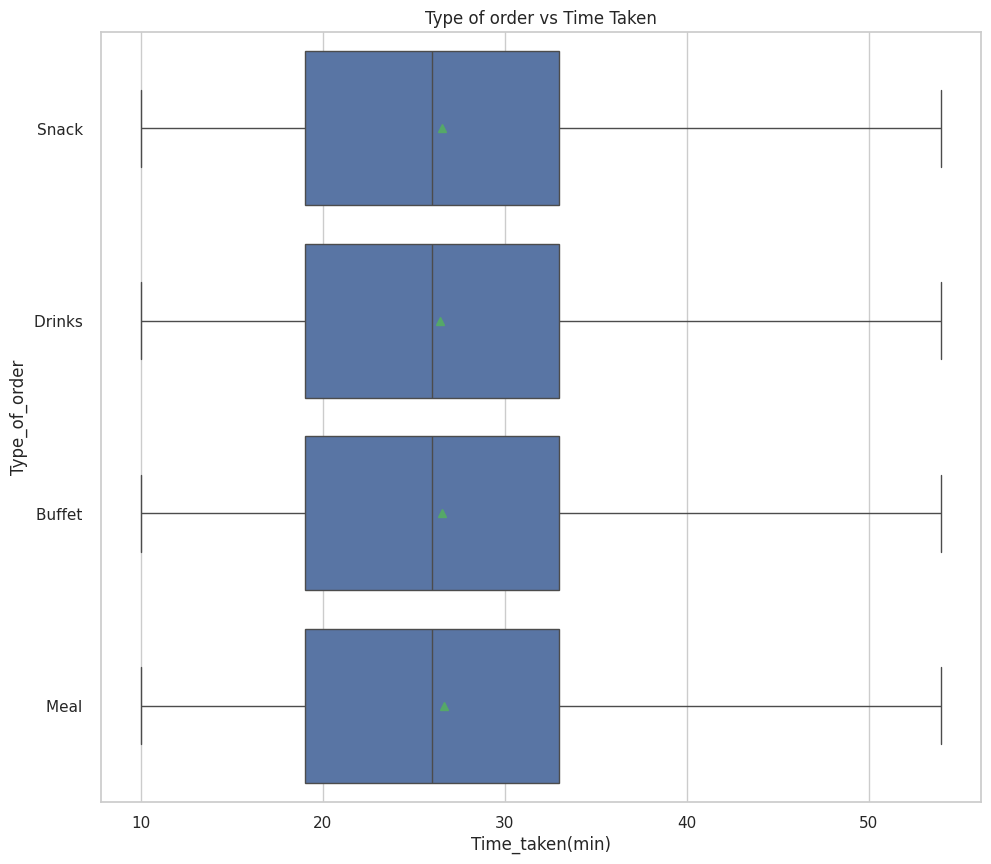

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Type of order vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Type_of_order', data=cleaned_Data, orient='h', showmeans=True)

The graph suggests that the type of order does not significantly influence the delivery time, as evidenced by similar median and mean values across different order types. 

Additionally, it's possible that delivery services employ strategies to prioritize and manage orders effectively, regardless of their type, to ensure consistent delivery times for customers. 

As such, while the type of order may provide some insight into customer preferences, it may not be a robust predictor for estimating delivery times.

### Logisticals variables against time taken:

#### Vehicle condition

<AxesSubplot: title={'center': 'vehicle condition vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Vehicle_condition'>

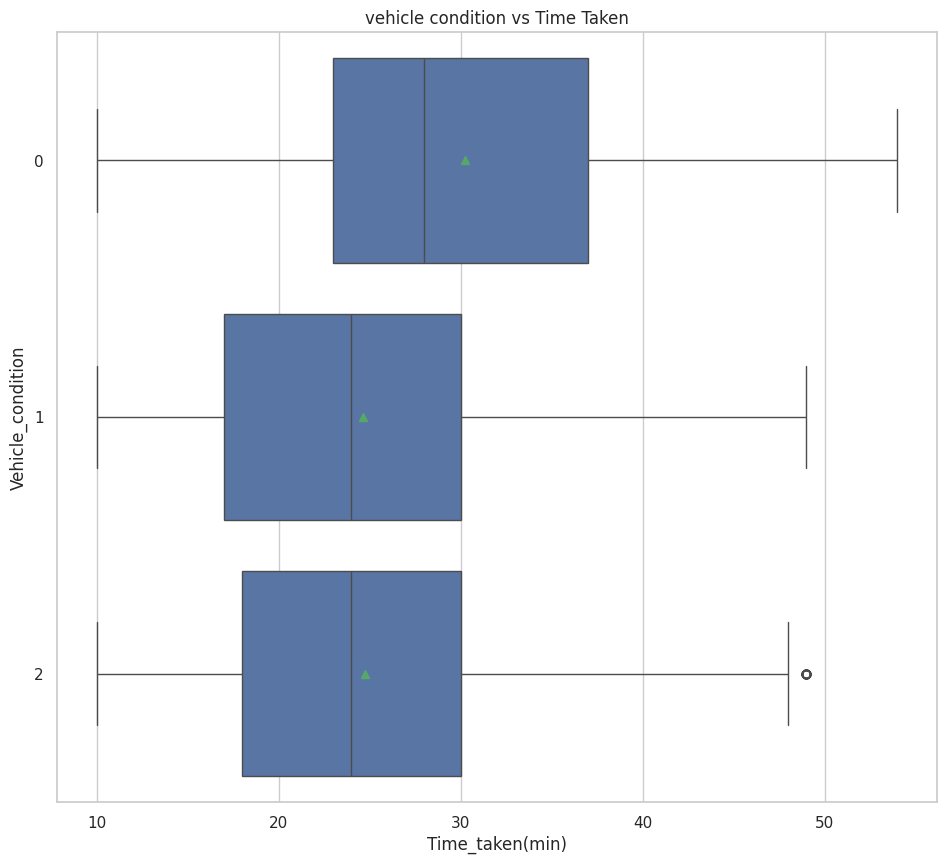

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('vehicle condition vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Vehicle_condition', data=cleaned_Data, orient='h', showmeans=True)

The graph indicates that a vehicle condition rated as '0' (bad) results in the longest delivery time, while a condition rated as '2' (very good) leads to the shortest delivery time. 

This suggests that when the vehicle condition is poor, speed may be adversely affected, resulting in longer delivery times compared to vehicles in good condition.

#### Type of vehicle

<AxesSubplot: title={'center': 'Type of vehicle vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Type_of_vehicle'>

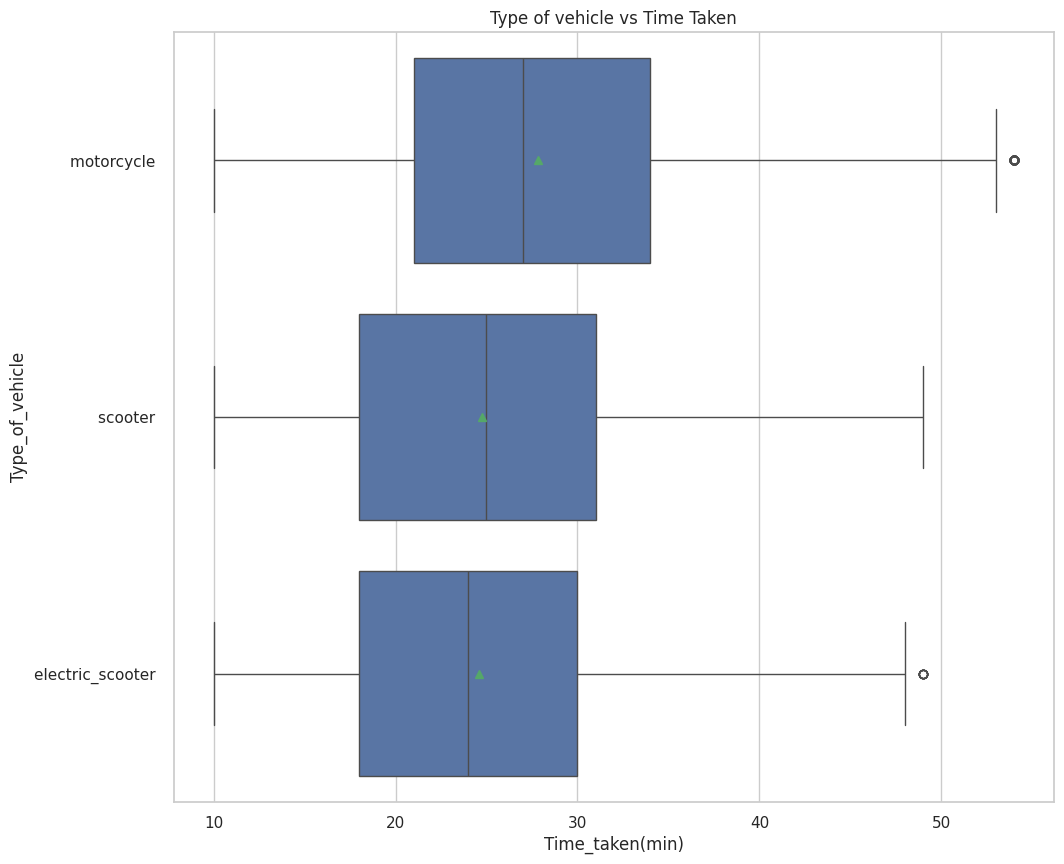

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Type of vehicle vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Type_of_vehicle', data=cleaned_Data, orient='h', showmeans=True)

We can observe that motorcycles take the longest time to deliver, while electric scooters take the shortest time. This could be due to motorcycles being restricted to roads, which are often affected by traffic density. 

In contrast, scooters and electric scooters are not only permitted on pedestrian walkways but may also utilize shortcut routes, such as alleyways, which motorcycles are not allowed to take. These factors enable scooters and electric scooters to navigate through traffic more efficiently, resulting in shorter delivery times.

#### Distance between restaurant and delivery place

<AxesSubplot: title={'center': 'Distace between restaurant and delivery place vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Distance_between_restaurant_and_delivery_place(KM)'>

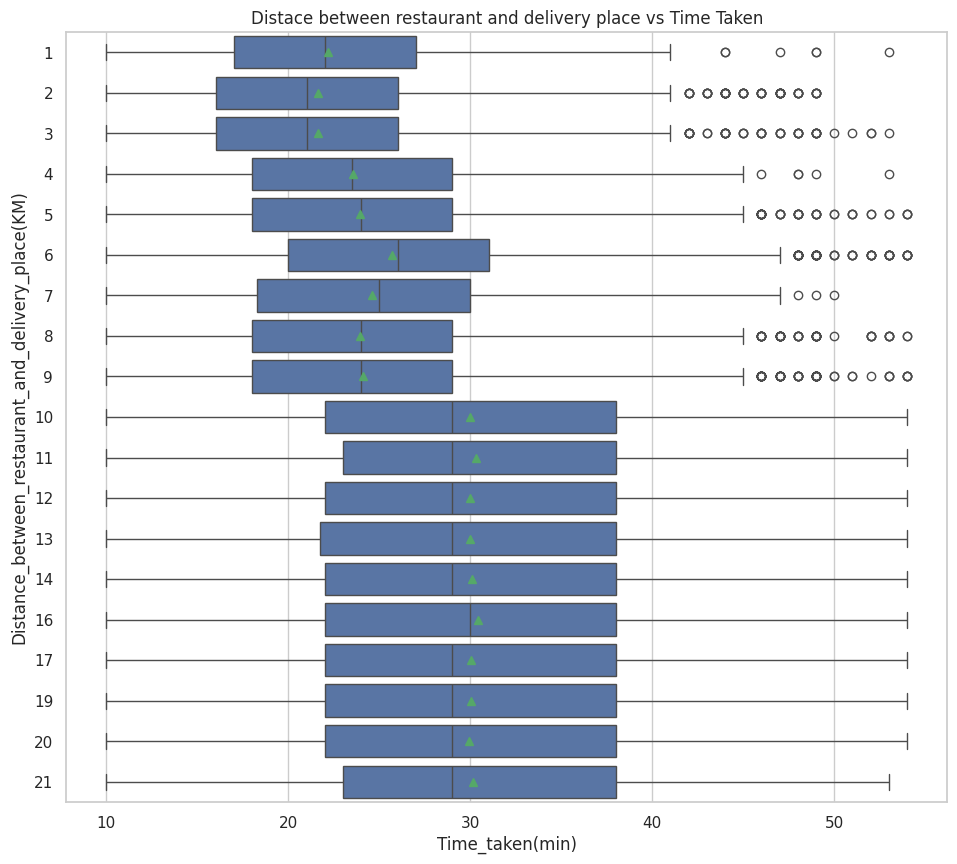

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Distace between restaurant and delivery place vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Distance_between_restaurant_and_delivery_place(KM)', data=cleaned_Data, orient='h', showmeans=True)

The graph clearly illustrates that as the distance between the restaurant and the destination grows, so does the delivery time. This relationship suggests that distance is a significant factor influencing delivery duration. 

Longer distances may require more time for the delivery person to travel, contributing to increased delivery times. Therefore, considering the distance between the restaurant and the destination could be a reliable predictor for estimating delivery times.

### Determine top 3 numerical variables

We determined the top 3 numerical variables among all the numerical variables to be used to train our models later using a correlation heatmap. From the correlation matrix, we found that the top 3 numerical variables with a stronger relationship to the time taken for delivery are delivery person age, delivery person ratings, and the distance between the restaurant and the delivery place

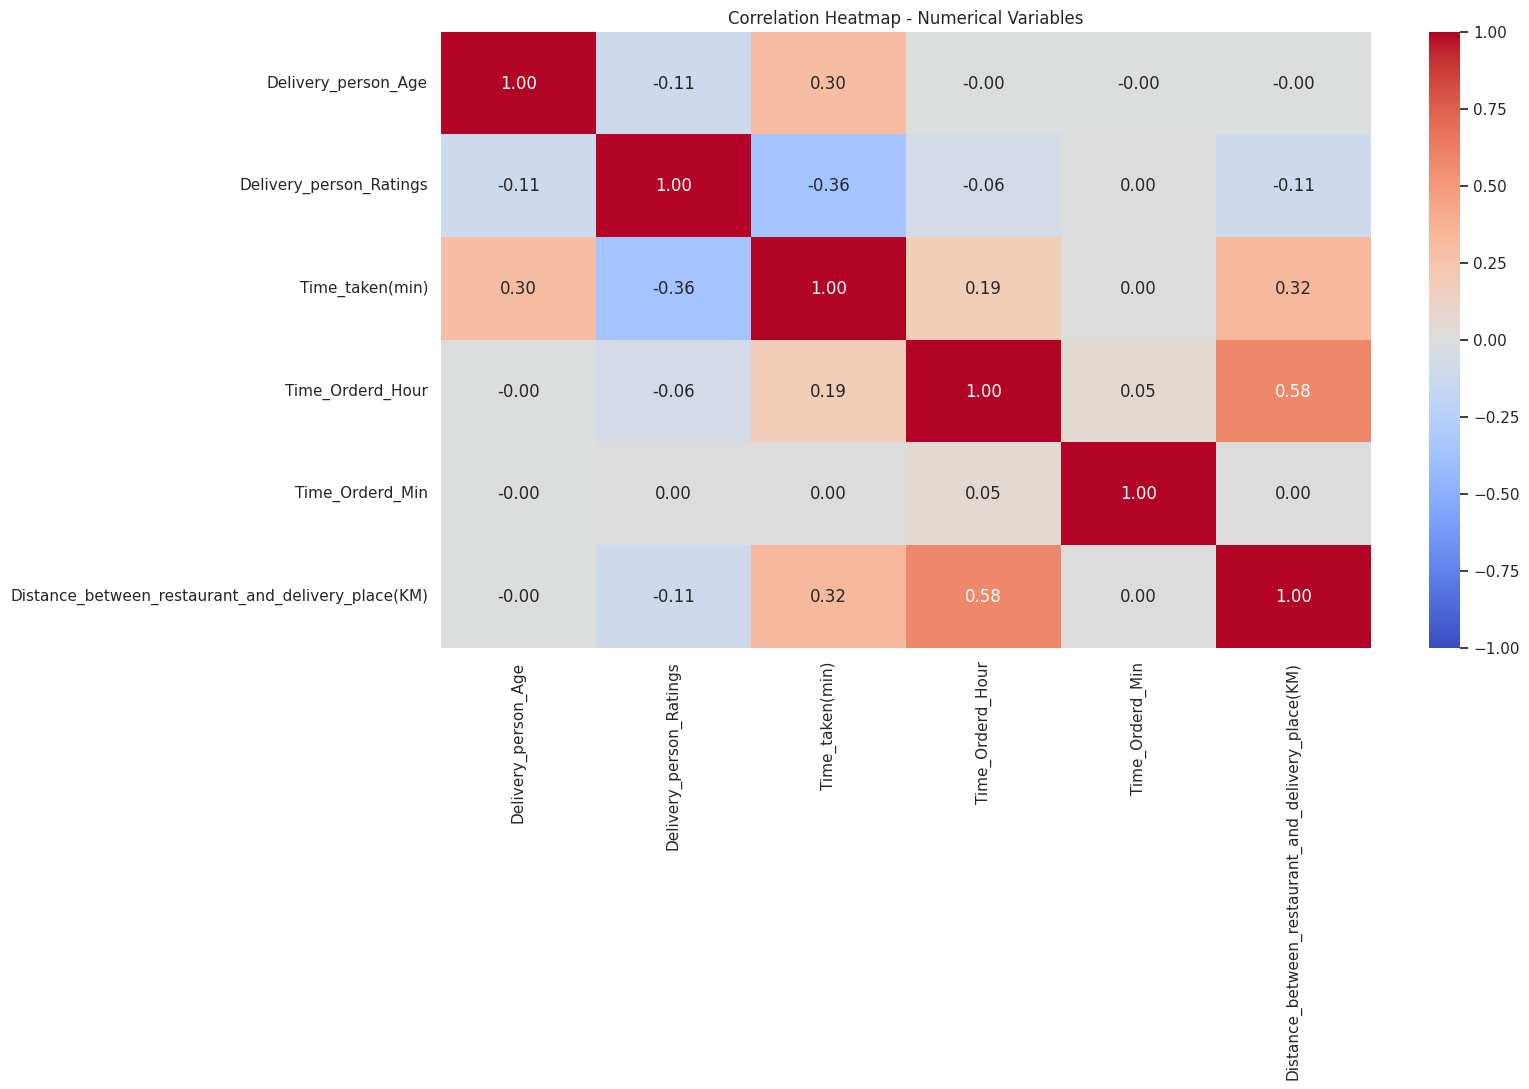

In [ ]:
joint_DF = pd.DataFrame(cleaned_Data[['Delivery_person_Age','Delivery_person_Ratings','Time_taken(min)','Time_Orderd_Hour', 'Time_Orderd_Min', 'Distance_between_restaurant_and_delivery_place(KM)']])
f = plt.figure(figsize=(15,8))
sb.heatmap(joint_DF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - Numerical Variables')
plt.show()

### Determine top 3 categorical variables

Next, we determined the top 3 categorical variables among all to be used to train our models later. To do this, we employed three methods:

1) Cramér's V
2) Correlation Heatmap
3) Random Forest Regression


From all three methods, we found that using the Random Forest Regression method to determine the top 3 categorical variables was the most accurate and suitable. Below, we provide a more detailed explanation.

#### Cramér's V

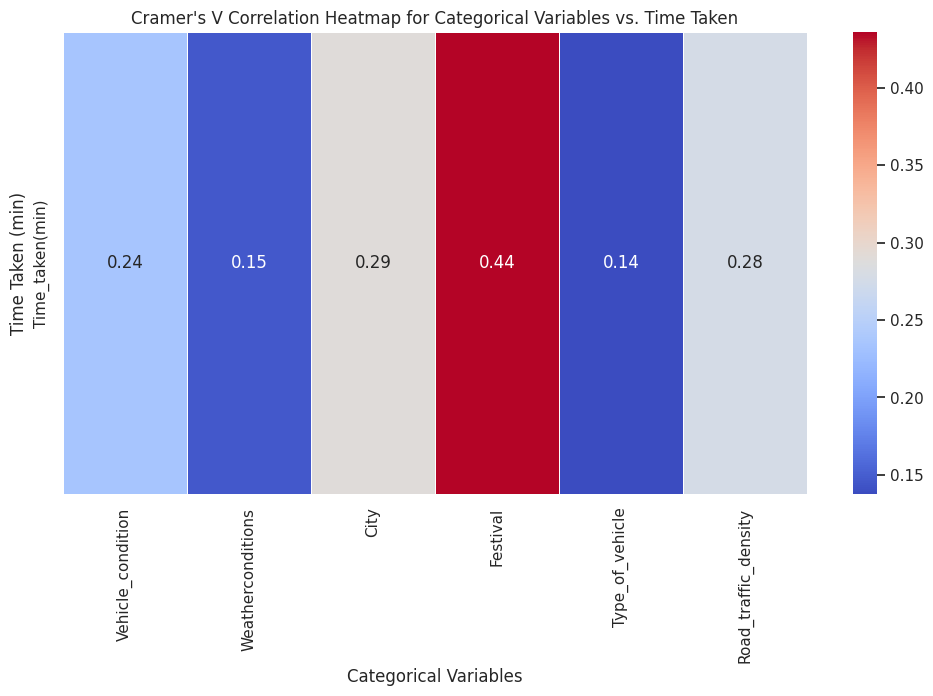

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramer's V for each pair of categorical variables
categorical_columns = ['Vehicle_condition', 'Weatherconditions', 'City', 'Festival', 'Type_of_vehicle', 'Road_traffic_density']
corr_matrix_categorical = pd.DataFrame(index=categorical_columns, columns=['Time_taken(min)'])
for col in categorical_columns:
    corr_matrix_categorical.loc[col, 'Time_taken(min)'] = cramers_v(cleaned_Data[col], cleaned_Data['Time_taken(min)'])

# Plot the heatmap for categorical variables vs. 'Time_taken'
plt.figure(figsize=(12, 6))
sb.heatmap(corr_matrix_categorical.T.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramer\'s V Correlation Heatmap for Categorical Variables vs. Time Taken')
plt.xlabel('Categorical Variables')
plt.ylabel('Time Taken (min)')
plt.show()

Cramér's V varies from 0 (corresponding to no association between the variables) to 1 (complete association) and can reach 1 only when each variable is completely determined by the other. It may be viewed as the association between two variables as a percentage of their maximum possible variation.

From the Cramér's V correlation heatmap, the top 3 categorical variables which have stronger relationship with the time taken for delivery is `festival`, `city` and `road_traffic_density`.

However Cramers V is NOT the most suitable statistic to determine which of the 6 categorical variables is the best predictor of time taken (numerical). This is because Cramer's V measures the association between pairs of categorical variables, but it does not inherently provide information about the predictive power of each individual variable.

To determine the predictive power of each categorical variable on a numerical target variable like "time taken," other methods such as feature importance analysis in machine learning models, like the Random Forest Regression model would be more appropriate. These methods analyze the contribution of each feature to the predictive performance of the model and can provide insights into which variables are the most influential in predicting the target variable.

In summary, while Cramer's V is useful for understanding the association between pairs of categorical variables, it is not directly applicable for determining the predictive power of individual variables on a numerical target variable. Other methods, such as feature importance analysis in machine learning models, are better suited for this purpose.

### Correlation Heatmap (One-Hot Encoded)

#### Why One-Hot Encoding?
1. When plotting a correlation matrix for categorical variables against a numerical target variable `Time_taken(min)`, one-hot encoding is often used to convert categorical variables into a format that can be handled by correlation-based analysis. 
2. Numerical Representation: Categorical variables, being non-numeric, cannot be directly used with correlation coefficients. One-hot encoding converts categorical variables into a numerical format that can be used in correlation analysis.
3. Dummy Variables: One-hot encoding creates dummy variables for each category in a categorical variable, representing them as binary (0 or 1) variables. This transformation allows us to quantify the presence or absence of each category in relation to the numerical target variable.
4. Independence Assumption: Correlation analysis assumes that the variables being compared are continuous and independent. One-hot encoding creates independent binary variables for each category, preserving the independence assumption required for correlation analysis.

Vehicle_condition                   -0.241702
Weatherconditions_ Cloudy            0.124491
Weatherconditions_ Fog               0.127975
Weatherconditions_ Sandstorms       -0.021000
Weatherconditions_ Stormy           -0.021400
Weatherconditions_ Sunny            -0.206099
Weatherconditions_ Windy            -0.009358
City_Metropolitian                   0.171447
City_Semi-Urban                      0.150659
City_Urban                          -0.194176
Festival_No                         -0.291264
Festival_Yes                         0.291264
Type_of_vehicle_electric_scooter    -0.062478
Type_of_vehicle_motorcycle           0.164883
Type_of_vehicle_scooter             -0.136224
Road_traffic_density_High            0.030347
Road_traffic_density_Low            -0.387234
Road_traffic_density_Medium          0.021114
Road_traffic_density_Very High       0.354319
Time_taken(min)                      1.000000
Name: Time_taken(min), dtype: float64


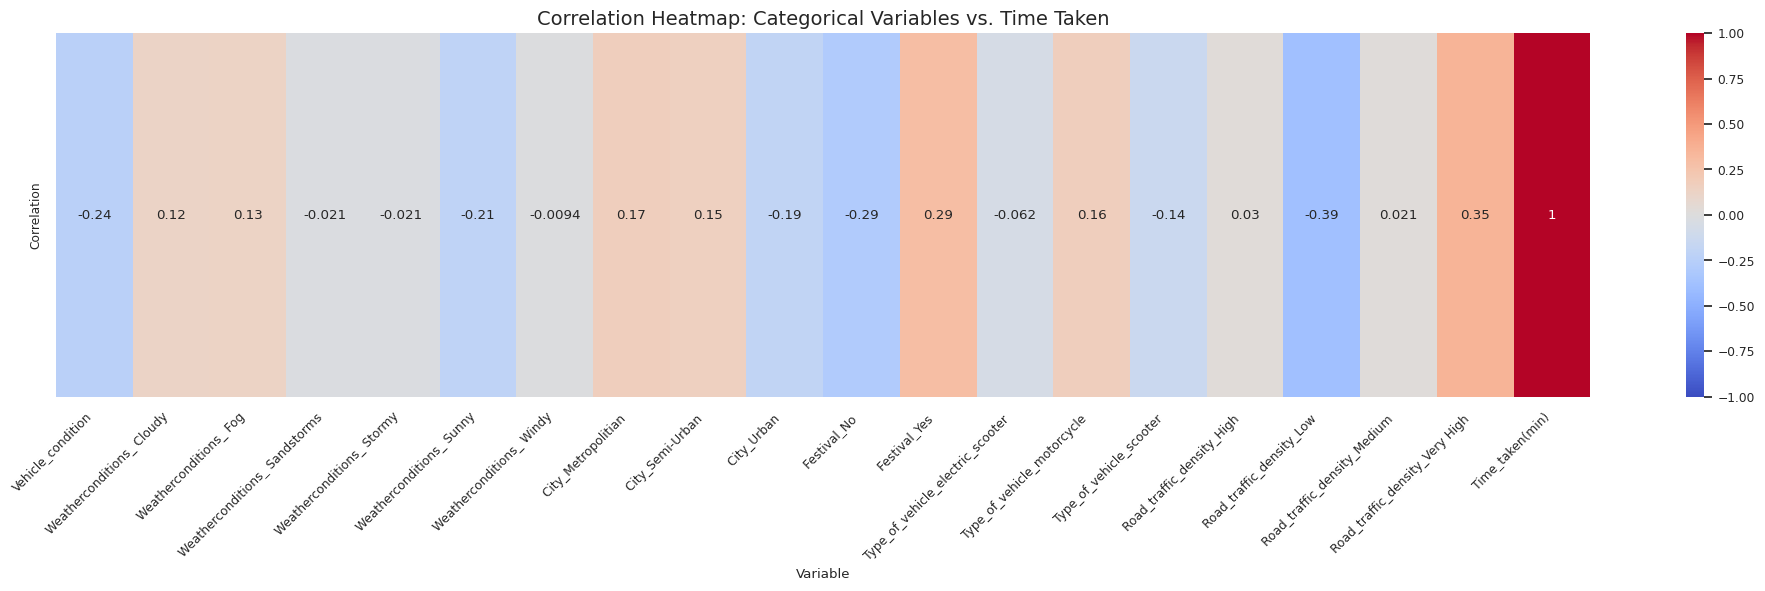

In [ ]:
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'City', 'Festival', 'Type_of_vehicle', 'Road_traffic_density']

# Select only the columns specified in categorical_cols
categorical_data = cleaned_Data[categorical_cols]

# One-hot encode the categorical variables
encoded_data = pd.get_dummies(categorical_data)

# Merge the encoded categorical variables with the target variable
merged_data = pd.concat([encoded_data, cleaned_Data['Time_taken(min)']], axis=1)

# Calculate the correlation matrix
corr_matrix = merged_data.corr(method='pearson')['Time_taken(min)']
print(corr_matrix)

# Convert Series to DataFrame
corr_df = pd.DataFrame(corr_matrix.reset_index())
corr_df.columns = ['Variable', 'Correlation']

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 6))
heatmap = sb.heatmap(corr_df.set_index('Variable').T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Heatmap: Categorical Variables vs. Time Taken', fontsize=14)
plt.tight_layout()
plt.show()

Correlation coefficients measure the strength and direction of the linear relationship between two variables, but they may not capture complex relationships between categorical and numerical variables. Categorical variables may have non-linear relationships with numerical variables, and correlation coefficients may not adequately capture such relationships.

Therefore, while you can compute the correlation matrix and visualize it using a heatmap as shown in the provided code, it may not directly determine which categorical variable is the "best" predictor of the numerical target variable.

#### Correlation Heatmap and Cramers V is NOT the best way to determine the top categorical factors.

| Aspect                           | Correlation Heatmap                      | Cramér's V                                    |
|----------------------------------|------------------------------------------|-----------------------------------------------|
| **Purpose**                      | Analyze linear relationship between continuous variables | Measure association between categorical variables |
| **Applicability**                | Continuous variables                    | Categorical variables                          |
| **Measure**                      | Pearson correlation coefficient         | Cramér's V (based on chi-square statistic)     |
| **Range**                        | -1 to 1                                 | 0 to 1                                         |
| **Interpretation**               | -1: Perfect negative linear relationship | 0: No association                              |
|                                  | 0: No linear relationship               | 1: Perfect association                         |
|                                  | 1: Perfect positive linear relationship |                                                 |
| **Explanation for Dataset**      | Correlation heatmap is suitable for identifying linear relationships between continuous variables, but it may not capture associations between categorical variables and the target variable well. | Cramér's V is specifically designed for measuring associations between categorical variables, making it suitable for identifying relationships between categorical variables and the target variable. |
| **Limitations**                  | It may not effectively capture non-linear relationships or associations between categorical variables and the target variable. | It may not fully capture complex relationships or interactions between categorical variables and the target variable, especially if there are many categories or sparse data in certain categories. |


#### Random Forest Regression 

Plotting Feature Importance Bar Chart using Random Forest Regression

#### One-Hot Encoded Feature Importance:

Top Features:
                          Feature  Importance
        Road_traffic_density_Low     0.322323
              Vehicle_condition_0    0.181165
         Weatherconditions_ Sunny    0.158803
  Road_traffic_density_Very High     0.069331
           Weatherconditions_ Fog    0.054056
                     Festival_No     0.051514
        Weatherconditions_ Cloudy    0.043122
                    Festival_Yes     0.039579
                      City_Urban     0.017980
                 City_Semi-Urban     0.016489
              City_Metropolitian     0.014346
     Road_traffic_density_Medium     0.007159
       Road_traffic_density_High     0.007140
    Weatherconditions_ Sandstorms    0.002578
        Weatherconditions_ Stormy    0.002438
         Weatherconditions_ Windy    0.002247
         Type_of_vehicle_scooter     0.002131
      Type_of_vehicle_motorcycle     0.002024
              Vehicle_condition_1    0.002011
              Vehicle_condition_2    0.001932
Type_of_vehicle_elec

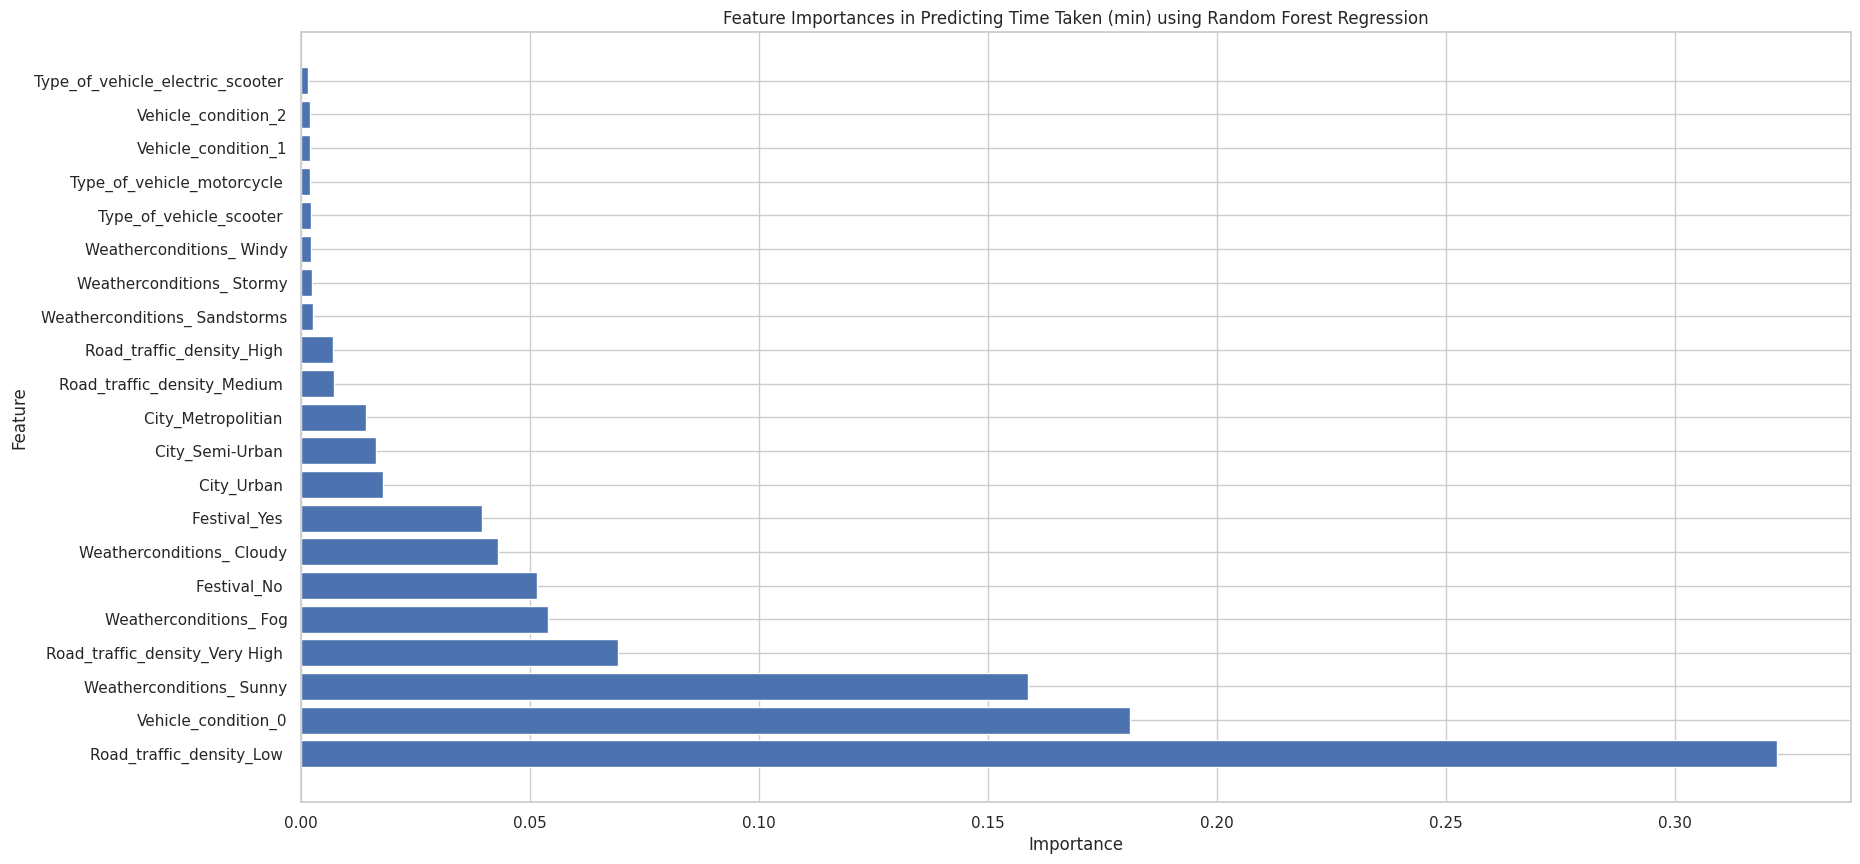

In [ ]:
# Assuming cleaned_Data contains your data
df = pd.DataFrame(cleaned_Data)

# Define the categorical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'City', 'Festival', 'Type_of_vehicle', 'Road_traffic_density']

# Apply one-hot encoding only to the specified columns
df_encoded = pd.get_dummies(df[categorical_cols], columns=categorical_cols)

# Add the target variable 'Time_taken(min)' to df_encoded
df_encoded['Time_taken(min)'] = df['Time_taken(min)']

# Assuming 'Time_taken(min)' is the target variable
y = df_encoded['Time_taken(min)']
X = df_encoded.drop('Time_taken(min)', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.to_string(index=False))

# Plot feature importances
plt.figure(figsize=(20, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Predicting Time Taken (min) using Random Forest Regression')
plt.show()

#### Non One-Hot Encoded Feature Importance:

Top Features:
             Feature  Importance
Road_traffic_density    0.418468
   Weatherconditions    0.249348
   Vehicle_condition    0.191253
            Festival    0.084526
                City    0.050424
     Type_of_vehicle    0.005981


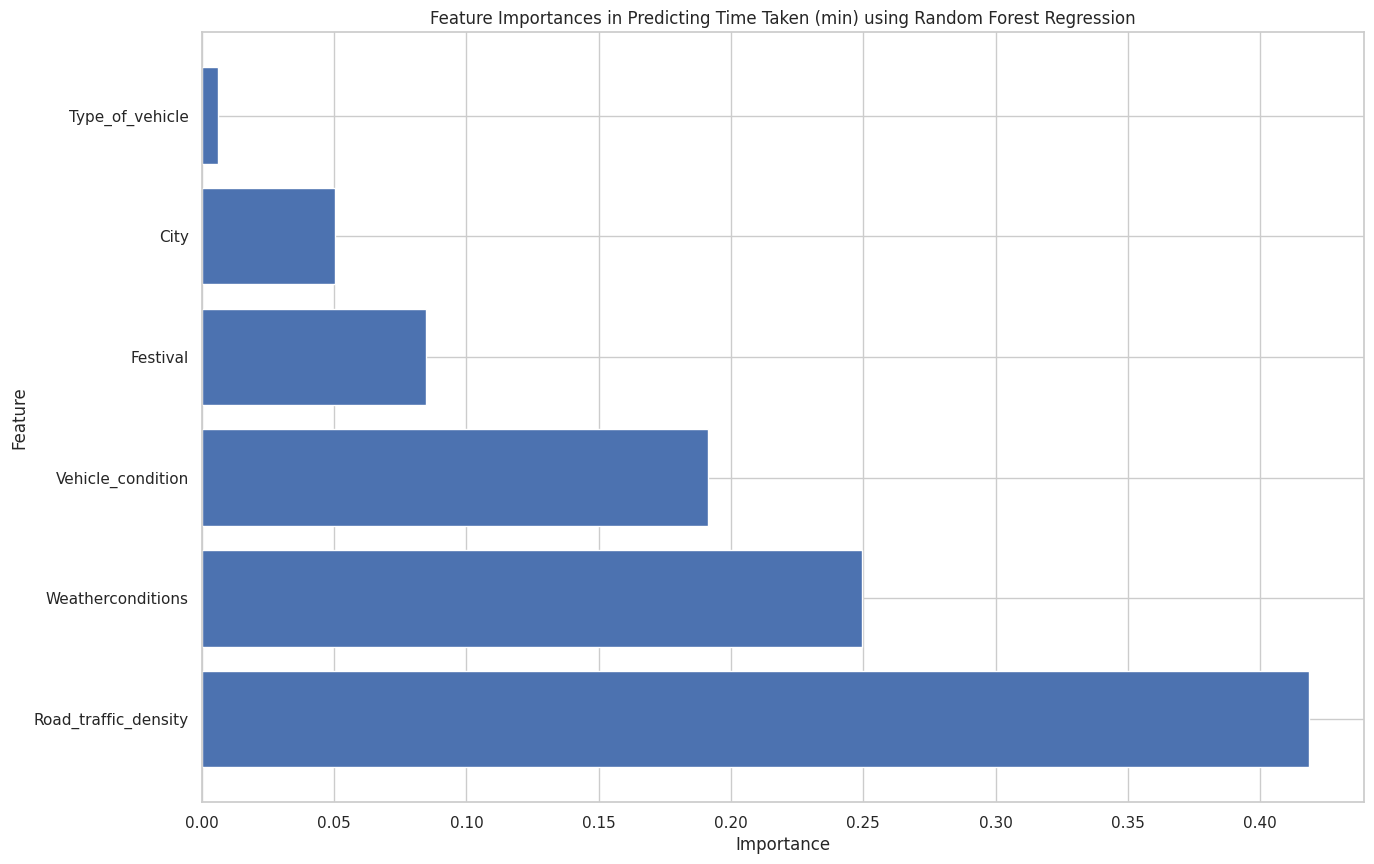

In [ ]:
# Assuming cleaned_Data contains your data
df = pd.DataFrame(cleaned_Data)


# Define the categorical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'City', 'Festival', 'Type_of_vehicle', 'Road_traffic_density']

# Label encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Assuming 'Time_taken(min)' is the target variable
y = df['Time_taken(min)']
X = df[categorical_cols] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.to_string(index=False))

# Plot feature importances
plt.figure(figsize=(15, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Predicting Time Taken (min) using Random Forest Regression')
plt.show()


From the result above, the top 3 categorical variables to predict Time_taken(min) from both the one-hot encoded graph and the non one-hot encoded graph are: `vehicle_condition`, `weatherconditions` and `road_traffic_density`

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=44a00546-0efa-4f5e-a5a5-ac13bae81f5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>